In [1]:
import qlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import math
import statsmodels.api as sm
from qlib.data import D
from qlib.config import REG_CN
from qlib.contrib.data.handler import Alpha158
from qlib.data.filter import NameDFilter, ExpressionDFilter
from qlib.contrib.model.gbdt import LGBModel
from qlib.contrib.data.handler import Alpha158
from qlib.utils import init_instance_by_config, flatten_dict
from qlib.workflow import R
from qlib.workflow.record_temp import SignalRecord, PortAnaRecord
import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError. CatBoostModel are skipped. (optional: maybe installing CatBoostModel can fix it.)
ModuleNotFoundError. XGBModel is skipped(optional: maybe installing xgboost can fix it).
ModuleNotFoundError.  PyTorch models are skipped (optional: maybe installing pytorch can fix it).


In [2]:
qlib.init(provider_uri='C:/Users/tantra/Desktop/data/day1_data_qlib', region=REG_CN)
expressionDFilter = ExpressionDFilter(rule_expression='$volume != 0')
instruments = D.instruments(market = 'all', filter_pipe=[expressionDFilter])
new = D.features(instruments = instruments, fields = ['$new'], start_time = '2022-01-01', end_time = '2025-07-07', freq = 'day').unstack().T.droplevel(0)
ST = D.features(instruments = instruments, fields = ['$ST'], start_time = '2022-01-01', end_time = '2025-07-07', freq = 'day').unstack().T.droplevel(0)
marketcap = D.features(instruments = instruments, fields = ['$marketcap'], start_time = '2022-01-01', end_time = '2025-07-07', freq = 'day').unstack().T.droplevel(0)
yjl = D.features(instruments = instruments, fields = ['$CONVERTIBLEPREMIUMRATE'], start_time = '2022-01-01', end_time = '2025-07-07', freq = 'day').unstack().T.droplevel(0)
data_close = D.features(instruments = instruments, fields = ['$close'], start_time = '2022-01-01', end_time = '2025-07-07', freq = 'day').unstack().T.droplevel(0)
data_open = D.features(instruments = instruments, fields = ['$open'], start_time = '2022-01-01', end_time = '2025-07-07', freq = 'day').unstack().T.droplevel(0)
QS = pd.read_csv('C:/Users/tantra/Desktop/数据/CBredeem.csv').pivot(index='TRADINGDATE', columns='SYMBOL9', values='FACTORVALUE')
QS.index = pd.to_datetime(QS.index)
# stock_list = D.list_instruments(instruments = instruments,
#                                 start_time='2022-01-01',
#                                 end_time='2025-03-31',
#                                 as_list=True)

[6468:MainThread](2025-07-16 10:41:11,316) INFO - qlib.Initialization - [config.py:420] - default_conf: client.
[6468:MainThread](2025-07-16 10:41:11,316) INFO - qlib.Initialization - [__init__.py:74] - qlib successfully initialized based on client settings.
[6468:MainThread](2025-07-16 10:41:11,316) INFO - qlib.Initialization - [__init__.py:76] - data_path={'__DEFAULT_FREQ': WindowsPath('C:/Users/tantra/Desktop/data/day1_data_qlib')}


In [ ]:
[x.strftime('%Y-%m-%d') + 'p1' for x in]

instrument,110038.SH,110043.SH,110044.SH,110045.SH,110047.SH,110048.SH,110052.SH,110053.SH,110055.SH,110056.SH,...,128136.SZ,128137.SZ,128138.SZ,128139.SZ,128140.SZ,128141.SZ,128142.SZ,128143.SZ,128144.SZ,128145.SZ
datetime,,,,,,,,,,,,,,,,,,,,,
2022-01-04,150.570007,122.300003,206.880005,118.949997,122.070000,246.820007,118.250000,120.550003,204.940002,135.229996,...,127.000000,156.000000,116.560997,118.000000,164.000000,130.300003,123.697998,129.990005,142.009995,143.660995
2022-01-05,144.690002,123.970001,208.020004,119.779999,122.169998,236.690002,119.540001,121.580002,205.139999,134.250000,...,125.000000,154.520996,116.809998,117.885002,161.210007,144.009995,124.699997,128.880005,140.110992,140.139999
2022-01-06,147.009995,123.940002,205.300003,119.809998,122.519997,225.630005,114.129997,121.440002,204.080002,135.839996,...,124.130997,151.800003,118.212997,117.989998,161.000000,145.367004,126.080002,130.899994,142.169998,142.259995
2022-01-07,143.330002,124.480003,206.070007,119.010002,123.940002,222.000000,114.800003,122.019997,197.070007,135.800003,...,125.000000,150.042999,118.323997,119.000000,159.600006,143.604004,124.970001,130.298996,145.789993,140.190002
2022-01-10,142.199997,125.589996,204.270004,119.010002,123.870003,217.990005,114.800003,123.489998,196.100006,136.119995,...,125.489998,150.100006,118.870003,126.000000,158.880005,145.699997,125.000000,130.250000,145.927002,140.850006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,116.566002,122.488998,128.873001,NaN,NaN,129.998001,130.229004,NaN,235.100006,NaN
2025-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,116.570999,122.320000,129.149994,NaN,NaN,130.134003,130.169998,NaN,235.300003,NaN
2025-07-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,115.848000,122.246002,128.917999,NaN,NaN,129.220001,128.330994,NaN,240.080002,NaN


In [3]:
ST_dict = {}
for i in ST.index:
    ST_dict[i] = ST[ST == 1].loc[i].dropna().index.tolist()

new_dict = {}
for i in new.index:
    new_dict[i] = new[new == 1].loc[i].dropna().index.tolist()

QS_dict = {}
for i in QS.index:
    QS_dict[i] = QS[QS == 1].loc[i].dropna().index.tolist()

In [745]:
yjl_factor = {}
for time in time_list:
    date = time[:-2]
    if time.endswith('p1'):
        yjl_factor[time] = ((yjl.shift(1) + yjl)/2).loc[date]
    if time.endswith('p2'):
        yjl_factor[time] = yjl.loc[date]
yjl_factor = pd.DataFrame(yjl_factor).T.dropna(how='all')

In [749]:
yjl_factor = {}
for time in time_list:
    date = time[:-2]
    if time.endswith('p1'):
        yjl_factor[time] = yjl.shift(1).loc[date]
    if time.endswith('p2'):
        yjl_factor[time] = yjl.loc[date]
yjl_factor = pd.DataFrame(yjl_factor).T

In [3]:
OVD = pd.read_csv('C:/Users/tantra/Desktop/数据/Fund_allValueDev.csv')
OVD = OVD.pivot(index='TRADINGDATE', columns='SYMBOL9', values='FACTORVALUE')
OVD.index = pd.to_datetime(OVD.index)
OVD = OVD.loc['2022-01-01':'2025-07-07'].dropna(how='all', axis=1)
#纯债溢价率
SPR = pd.read_csv('C:/Users/tantra/Desktop/数据/Fund_StrbPremiumRate.csv')
SPR = SPR.pivot(index='TRADINGDATE', columns='SYMBOL9', values='FACTORVALUE')
SPR.index = pd.to_datetime(SPR.index)
SPR = SPR.loc['2022-01-01':'2025-07-07'].dropna(how='all', axis=1)

In [4]:
qlib.init(provider_uri='C:/Users/tantra/Desktop/data/min1_data_qlib', region=REG_CN)
instruments = D.instruments(market = 'all')

[6468:MainThread](2025-07-16 10:44:35,924) INFO - qlib.Initialization - [config.py:420] - default_conf: client.
[6468:MainThread](2025-07-16 10:44:35,924) INFO - qlib.Initialization - [__init__.py:74] - qlib successfully initialized based on client settings.
[6468:MainThread](2025-07-16 10:44:35,924) INFO - qlib.Initialization - [__init__.py:76] - data_path={'__DEFAULT_FREQ': WindowsPath('C:/Users/tantra/Desktop/data/min1_data_qlib')}


In [5]:
# 剔除当天正股为ST股的可转债的因子值,factor为dict格式
def exclude_ST(factor):
    for date in factor.keys():
        dates = date[:-2]
        factor[date] = factor[date][ST.loc[dates] == 0]
    return factor

# 剔除当天为新债的可转债的因子值，factor为dict格式
def exclude_newbond(factor):
    for date in factor.keys():
        dates = date[:-2]
        factor[date] = factor[date][new.loc[dates] == 0]
    return factor

# 剔除当天为强赎的可转债的因子值，factor为dict格式
def exclude_QS(factor):
    for date in factor.keys():
        dates = date[:-2]
        factor[date] = factor[date][QS.loc[dates] == 0]
    return factor

# 缩尾处理将超过分位数的因子替换为边界值,factor为dict格式，low为下分位数，up为上分位数
def winsorize(factor,low = 0.01, up = 0.99):
    for date in factor.keys():
        s = factor[date].copy()
        lower = s.quantile(low)
        upper = s.quantile(up)
        factor[date] = s.clip(lower, upper)
    return factor

# 标准化处理,factor为dict格式
def factor_std(factor):
    for date in factor.keys():
        factor[date] = (factor[date] - factor[date].mean()) / factor[date].std()
    return factor

# 缩尾和标准化，factor为dataframe格式，返回dataframe格式
def win_std(factor):
    return pd.DataFrame(factor_std(winsorize(factor_dict(factor)))).T

# 将dataframe格式的因子数据表变为dict格式,
def factor_dict(factor):
    factor_dict = {}
    for day in list(factor.index):
        factor_dict[day] = factor.loc[day].sort_values()
    return factor_dict

# 对溢价率中性化,factor为dict格式
def net_yjl(factor):
    data_yjl = factor_dict(yjl)
    for date in factor.keys():
        y = factor[date].dropna()
        x = data_yjl[date].dropna()
        x, y = x.align(y, join='inner')
        X = sm.add_constant(x)
        model = sm.OLS(y, X).fit()
        factor[date] = model.resid.sort_values()
    return factor

# 对市值中性化,factor为dict格式
def net_marketcap(factor):
    data_marketcap = factor_dict(marketcap)
    for date in factor.keys():
        y = factor[date].dropna()
        x = data_marketcap[date].dropna()
        x, y = x.align(y, join='inner')
        X = sm.add_constant(x)
        model = sm.OLS(y, X).fit()
        factor[date] = model.resid.sort_values()
    return factor

# 对因子中性化，factor1为需要被中性化的因子，factor1为dataframe格式,factor_list为需要对其中性化的因子变量列表，列表中每一个变量是dataframe格式
def net_factor(factor1, factor_list):
    date_list = factor1.index
    for i in factor_list:
        date_list = date_list.intersection(i.index)
    factor = {}
    for date in date_list:
        factor_x = pd.DataFrame()
        for i in factor_list: 
            factor_x = pd.concat([factor_x, i.loc[date]], axis=1) 
        y = factor1.loc[date].dropna()
        x = factor_x.dropna()
        x, y = x.align(y, join='inner', axis=0)
        X = sm.add_constant(x)
        model = sm.OLS(y, X).fit()
        factor[date] = model.resid.sort_values()
    return factor

# 制作相关系数矩阵,factor_list为因子变量的列表，每个元素为dataframe格式的因子，factor_name为因子名字符串的列表
def cal_corr_matrix(factor_list, factor_name):
    dict_factor = dict(zip(factor_name, factor_list))
    corr_matrix = pd.DataFrame(columns=factor_name, index=factor_name)
    for factor1 in factor_name:
        for factor2 in factor_name:
            corr_matrix.loc[factor1, factor2] = dict_factor[factor1].loc['2023-01-01':].corrwith(dict_factor[factor2].loc['2023-01-01':], axis=1).mean()
    return corr_matrix


In [6]:
# 计算因子每日分组收益率,N为分组数,factor为dict格式
def cal_group_return(factor, N):
    date_list = list(factor.keys())
    group_return={}
    if cal_RankIC_mean(factor) > 0:
        for date in date_list:
            dates = pd.to_datetime(date[:-2])
            stock_all = factor[date].index.tolist()
            factor[date] = factor[date].dropna().sort_values()
            stock_return={}
            for i in range(1,N+1):
                stock_i = factor[date].iloc[int(len(factor[date])/N*(i-1)):int(len(factor[date])/N*i)].index.tolist()
                stock_i = [x for x in stock_i if x not in ST_dict[dates] and x not in new_dict[dates] and x not in QS_dict[dates]]
                stock_i_return = (data_close_part.shift(-1)/data_close_part - 1).loc[date,stock_i].mean()
                stock_return['group'+str(i)] = stock_i_return
            stock_return['long-short'] = stock_return['group'+str(N)] - stock_return['group1']
            stock_return['benchmark'] = (data_close_part.loc[:,stock_all].shift(-1)/data_close_part.loc[:,stock_all] - 1).loc[date].mean()
            group_return[date] = pd.Series(stock_return)
    else:
        for date in date_list:
            dates = pd.to_datetime(date[:-2])
            stock_all = factor[date].index.tolist()
            factor[date] = factor[date].dropna().sort_values()
            stock_return={}
            for i in range(1,N+1):
                stock_i = factor[date].iloc[int(len(factor[date])/N*(i-1)):int(len(factor[date])/N*i)].index.tolist()
                stock_i = [x for x in stock_i if x not in ST_dict[dates] and x not in new_dict[dates] and x not in QS_dict[dates]]
                stock_i_return = (data_close_part.shift(-1)/data_close_part - 1).loc[date,stock_i].mean()
                stock_return['group'+str(i)] = stock_i_return
            stock_return['long-short'] = stock_return['group1'] - stock_return['group'+str(N)]
            stock_return['benchmark'] = (data_close_part.loc[:,stock_all].shift(-1)/data_close_part.loc[:,stock_all] - 1).loc[date].mean()
            group_return[date] = pd.Series(stock_return)
    return group_return

In [7]:
# 计算分组每期换手率,factor为dict格式
def cal_group_turnover(factor, N):
    turnover = pd.DataFrame()
    for i in range(1,N+1):
        stock_amount = {}
        for time in factor.keys():
            stock_amount[time] = set(factor[time].dropna().iloc[int(len(factor[time].dropna())/N*(i-1)):int(len(factor[time].dropna())/N*i)].index)
        stock_amount = pd.Series(stock_amount)
        turnover_rate = pd.Series(index=stock_amount.index, name=f'group{i}')
        for i in range(1,len(stock_amount)):
            prev_set = stock_amount[i-1]
            current_set = stock_amount[i]
            new_elements = len(current_set - prev_set)
            try:
                turnover_rate[i] = new_elements / len(prev_set)
            except:
                turnover_rate[i] = 0
        turnover = pd.concat([turnover,turnover_rate], axis=1)
    return turnover

# 画出分组累积超额收益走势，factor为dict格式，N为组数
def plot_return(factor, N, turnover=0.0001):
    group_return = cal_group_return(factor, N)
    group_cum_return = pd.DataFrame(group_return).T.shift(1)
    group_turnover = cal_group_turnover(factor,N)
    for i in range(1,N+1):
        group_cum_return['group'+str(i)] = group_cum_return['group'+str(i)] - group_cum_return['benchmark'] - group_turnover['group'+str(i)] * turnover
    group_cum_return.iloc[0] = 0
    group_cum_return = group_cum_return.dropna(how='all')
    group_cum_return.groupby([x[:-2] for x in group_cum_return.index]).sum().cumsum().iloc[:,:N+1].plot()

# 计算年化收益率，factor为dict格式，N为组数
def cal_annual_return(factor, N):
    return (pd.DataFrame(cal_group_return(factor, N)).T).mean() * 504

# 计算每日RankIC值，factor为dict格式
def cal_RankIC(factor):
   factor = pd.DataFrame(factor)
   return factor.corrwith((data_close_part.shift(-1)/data_close_part-1).T, method = 'spearman')

# 计算每日RankIC均值，factor为dict格式
def cal_RankIC_mean(factor):
    RankIC = cal_RankIC(factor).mean()
    return RankIC

# 计算日度RankICIR值，factor为dict格式
def cal_RankICIR(factor):
    RankIC = cal_RankIC(factor)
    ICIR = RankIC.mean() / RankIC.std()
    return ICIR

# 计算分组累积超额收益,factor为dict格式,N为组数
def cal_alpha(factor, N):
    group_return = cal_group_return(factor, N)
    group_return = pd.DataFrame(group_return).T
    group_return_cumprod = (group_return + 1).cumprod()
    excess_Return = group_return_cumprod.sub(group_return_cumprod['benchmark'], axis = 0)
    return excess_Return.iloc[:,:-1]

# 计算多头年化超额,factor为dict格式，N为组数
def cal_long_return(factor, N):
    if cal_RankIC_mean(factor) > 0:
        group_return = pd.DataFrame(cal_group_return(factor, N)).T
        long = group_return['group'+str(N)] - group_return['benchmark']
        long = long.groupby(long.index.map(lambda x: x[:-2])).sum()[:-1].mean() * 252
        return long
    else:
        group_return = pd.DataFrame(cal_group_return(factor, N)).T
        long = group_return['group1'] - group_return['benchmark']
        long = long.groupby(long.index.map(lambda x: x[:-2])).sum()[:-1].mean() * 252
        return long
    
# 计算多头超额胜率,factor为dict格式，N为组数
def cal_long_winrate(factor, N):
    if cal_RankIC_mean(factor) > 0:
        group_return = pd.DataFrame(cal_group_return(factor, N)).T
        long = group_return['group'+str(N)] - group_return['benchmark']
        long = long.groupby(long.index.map(lambda x: x[:-2])).sum()[:-1].dropna()
        long_winrate = (long > 0).sum() / len(long)
        return long_winrate
    else:
        group_return = pd.DataFrame(cal_group_return(factor, N)).T
        long = group_return['group1'] - group_return['benchmark']
        long = long.groupby(long.index.map(lambda x: x[:-2])).sum()[:-1].dropna()
        long_winrate = (long > 0).sum() / len(long)
        return long_winrate
    
# 计算年化夏普比率,factor为dict格式，N为组数，rate为无风险利率
def cal_sharp(factor, N, rate=0.02):
    annual_return = cal_annual_return(factor, N) - rate
    std = pd.DataFrame(cal_group_return(factor, N)).T.std() * math.sqrt(504)
    sharp = annual_return / std 
    return sharp

# 计算概率，factor为dict格式，N为组数
def cal_probability(factor, N):
    group_return = pd.DataFrame(cal_group_return(factor, N)).T.iloc[:,:-1]
    group_return = group_return.rolling(20).sum().dropna(how = 'all')
    group_cols = [col for col in group_return.columns[:N]]
    if cal_RankIC_mean(factor) < 0:
        for i in range(1,4):
            if i == 1:
                group_return['概率1'] = group_return.apply(lambda row: 1 if row[group_cols[-1]] <= row[:N].min() else 0, axis=1)
            if i == 2:
                group_return['概率2'] = group_return.apply(lambda row: 1 if row[group_cols[0]] >= row[:N].max() else 0, axis=1)
            if i == 3:
                group_return['概率3'] = group_return.apply(lambda row: 1 if all(row[group_cols[i]] >= row[group_cols[i+1]] for i in range(len(group_cols)-1)) else 0, axis=1)
        group_return['概率0'] = group_return.apply(lambda row: 1 if all( row['概率' + str(i)] != 1 for i in range(1,4)) else 0, axis=1)
    else:
        for i in range(1,4):
            if i == 1:
                group_return['概率1'] = group_return.apply(lambda row: 1 if row[group_cols[0]] <= row[:N].min() else 0, axis=1)
            if i == 2:
                group_return['概率2'] = group_return.apply(lambda row: 1 if row[group_cols[-1]] >= row[:N].max() else 0, axis=1)
            if i == 3:
                group_return['概率3'] = group_return.apply(lambda row: 1 if all(row[group_cols[i]] <= row[group_cols[i+1]] for i in range(len(group_cols)-1)) else 0, axis=1)
        group_return['概率0'] = group_return.apply(lambda row: 1 if all( row['概率' + str(i)] != 1 for i in range(1,4)) else 0, axis=1)
    n = len(group_return.index)
    p0, p1, p2, p3 = group_return['概率0'].sum()/n, group_return['概率1'].sum()/n, group_return['概率2'].sum()/n, group_return['概率3'].sum()/n
    return pd.Series([p0,p1,p2,p3],index = ['概率0','概率1','概率2','概率3'])

# 加权函数
def weight_sum(series, N):
    weight = 1 / (sum(range(1,N+1)) / N)
    weight = pd.Series(range(1,N+1), index=series.index) * weight / N
    return (series * weight).sum()

In [8]:
# 计算多头每期换手率,factor为dict格式
def cal_turnover(factor, N):
    stock_amount = {}
    if cal_RankIC_mean(factor) < 0:
        for time in factor.keys():
            date = pd.to_datetime(time[:-2])
            stock_amount[time] = set(factor[time].dropna().iloc[:int(len(factor[time].dropna())/N)].index) - set(ST_dict[date]) - set(new_dict[date]) - set(QS_dict[date])
    else:
        for time in factor.keys():
            date = pd.to_datetime(time[:-2])
            stock_amount[time] = set(factor[time].dropna().iloc[int(len(factor[time].dropna())/N*(N-1)):].index) - set(ST_dict[date]) - set(new_dict[date]) - set(QS_dict[date])
    stock_amount = pd.Series(stock_amount)
    turnover_rate = pd.Series(index=stock_amount.index)
    for i in range(1,len(stock_amount)):
        prev_set = stock_amount[i-1]
        current_set = stock_amount[i]
        new_elements = len(current_set - prev_set)
        try:
            turnover_rate[i] = new_elements / len(prev_set)
        except:
            turnover_rate[i] = 0
    return turnover_rate

# 计算多头每日平均换手率，factor为dict格式
def cal_turnover_mean(factor, N):
    turnover_rate = cal_turnover(factor, N)
    grouped = turnover_rate.groupby(turnover_rate.index.map(lambda x: x[:-2])).sum()
    return grouped[1:].mean()

In [9]:
# 计算多头年化超额（考虑换手率）,factor为dict格式，N为组数
def cal_long_return_turnover(factor, N, turnover=0.0001):
    if cal_RankIC_mean(factor) > 0:
        group_return = pd.DataFrame(cal_group_return(factor, N)).T.shift(1)
        long = group_return['group'+str(N)] - group_return['benchmark'] - cal_turnover(factor, N) * turnover
        long = long.groupby(long.index.map(lambda x: x[:-2])).sum()[1:-1].mean() * 252
        return long
    else:
        group_return = pd.DataFrame(cal_group_return(factor, N)).T.shift(1)
        long = group_return['group1'] - group_return['benchmark'] - cal_turnover(factor, N) * turnover
        long = long.groupby(long.index.map(lambda x: x[:-2])).sum()[1:-1].mean() * 252
        return long
    
# 计算多头超额胜率（考虑换手率）,factor为dict格式，N为组数    
def cal_long_winrate_turnover(factor, N, turnover=0.0001):
    if cal_RankIC_mean(factor) > 0:
        group_return = pd.DataFrame(cal_group_return(factor, N)).T.shift(1)
        long = group_return['group'+str(N)] - group_return['benchmark'] - cal_turnover(factor, N) * turnover
        long = long.groupby(long.index.map(lambda x: x[:-2])).sum()[1:-1].dropna()
        long_winrate = (long > 0).sum() / len(long)
        return long_winrate
    else:
        group_return = pd.DataFrame(cal_group_return(factor, N)).T.shift(1)
        long = group_return['group1'] - group_return['benchmark'] - cal_turnover(factor, N) * turnover
        long = long.groupby(long.index.map(lambda x: x[:-2])).sum()[1:-1].dropna()
        long_winrate = (long > 0).sum() / len(long)
        return long_winrate

In [10]:
# 分池，factor为dataframe格式
def cal_pool_factor(factor):
    mark = pd.read_csv('C:/Users/tantra/Desktop/数据/CBStyleMark.csv', parse_dates=['date'])
    factor_dict = {}
    for day in list(factor.index):
        factor_dict[day] = factor.loc[day].sort_values()
    pools = ['GP','ZP','DP']
    for pool in pools:
        if pool == 'GP':
            factor_day_GP = {}
            for date in factor_dict.keys():
                dates = date[:-2]
                mark1 = mark[mark['date'] == dates]
                mark1 = mark1[mark1['GP'] == 1]
                pool_stocklist = mark1['SYMBOL9'].tolist()
                factor_day_GP[date] = factor_dict[date].loc[pool_stocklist].sort_values()
        if pool == 'ZP':
            factor_day_ZP = {}
            for date in factor_dict.keys():
                dates = date[:-2]
                mark1 = mark[mark['date'] == dates]
                mark1 = mark1[mark1['ZP'] == 1]
                pool_stocklist = mark1['SYMBOL9'].tolist()
                factor_day_ZP[date] = factor_dict[date].loc[pool_stocklist].sort_values()
        if pool == 'DP':
            factor_day_DP = {}
            for date in factor_dict.keys():
                dates = date[:-2]
                mark1 = mark[mark['date'] == dates]
                mark1 = mark1[mark1['DP'] == 1]
                pool_stocklist = mark1['SYMBOL9'].tolist()
                factor_day_DP[date] = factor_dict[date].loc[pool_stocklist].sort_values()
    return factor_day_GP,factor_day_ZP,factor_day_DP

In [11]:
# 分池因子分析，factor为dataframe格式，N为组数
def factor_analyse(factor, st=True, new=True, qs=True, yjl=False, mar=False, win=True, std=True, N1=3, N2=4, N3=3):
    sample = ['训练期', '验证期', '测试期']
    features = ['RankICIR', '多头年化超额', '多头超额胜率', '多空夏普比率', '概率1', '概率2']
    pools = ['高平池', '中平池', '低平池']
    factor_summary = {}
    for sam in sample:
        if sam == '训练期':
            factor_df = factor.loc['2023-01-03p1':'2024-06-28p2']
            factor_pool = {}
            factor_gp, factor_zp, factor_dp = cal_pool_factor(factor_df)
            # if st:
            #     factor_gp, factor_zp, factor_dp  = exclude_ST(factor_gp), exclude_ST(factor_zp), exclude_ST(factor_dp)
            # if new:
            #     factor_gp, factor_zp, factor_dp  = exclude_newbond(factor_gp), exclude_newbond(factor_zp), exclude_newbond(factor_dp)
            # if qs:
            #     factor_gp, factor_zp, factor_dp  = exclude_QS(factor_gp), exclude_QS(factor_zp), exclude_QS(factor_dp)
            if yjl:
                factor_gp, factor_zp, factor_dp  = net_yjl(factor_gp), net_yjl(factor_zp), net_yjl(factor_dp)
            if mar:
                factor_gp, factor_zp, factor_dp  = net_marketcap(factor_gp), net_marketcap(factor_zp), net_marketcap(factor_dp)  
            if win:
                factor_gp, factor_zp, factor_dp  = winsorize(factor_gp), winsorize(factor_zp), winsorize(factor_dp)
            if std:
                factor_gp, factor_zp, factor_dp  = factor_std(factor_gp), factor_std(factor_zp), factor_std(factor_dp)
            for pool in pools:
                if pool == '高平池':
                    factor_pool[pool] = pd.Series([cal_RankICIR(factor_gp), cal_long_return(factor_gp, N1), cal_long_winrate(factor_gp, N1), 
                                                   cal_sharp(factor_gp, N1, rate=0.02).tolist()[-2]] + cal_probability(factor_gp, N1).tolist()[1:3], index = features) 
                if pool == '中平池': 
                    factor_pool[pool] = pd.Series([cal_RankICIR(factor_zp), cal_long_return(factor_zp, N2), cal_long_winrate(factor_zp, N2), 
                                                   cal_sharp(factor_zp, N2, rate=0.02).tolist()[-2]] + cal_probability(factor_zp, N2).tolist()[1:3], index = features)
                if pool == '低平池':
                    factor_pool[pool] = pd.Series([cal_RankICIR(factor_dp), cal_long_return(factor_dp, N3), cal_long_winrate(factor_dp, N3), 
                                                   cal_sharp(factor_dp, N3, rate=0.02).tolist()[-2]] + cal_probability(factor_dp, N3).tolist()[1:3], index = features)
        factor_summary[sam] = factor_pool
        if sam == '验证期':
            factor_df = factor.loc['2024-07-01p1':'2024-12-31p2']
            factor_pool = {}
            factor_gp, factor_zp, factor_dp = cal_pool_factor(factor_df)
            # if st:
            #     factor_gp, factor_zp, factor_dp  = exclude_ST(factor_gp), exclude_ST(factor_zp), exclude_ST(factor_dp)
            # if new:
            #     factor_gp, factor_zp, factor_dp  = exclude_newbond(factor_gp), exclude_newbond(factor_zp), exclude_newbond(factor_dp)
            # if qs:
            #     factor_gp, factor_zp, factor_dp  = exclude_QS(factor_gp), exclude_QS(factor_zp), exclude_QS(factor_dp)
            if yjl:
                factor_gp, factor_zp, factor_dp  = net_yjl(factor_gp), net_yjl(factor_zp), net_yjl(factor_dp)
            if mar:
                factor_gp, factor_zp, factor_dp  = net_marketcap(factor_gp), net_marketcap(factor_zp), net_marketcap(factor_dp)  
            if win:
                factor_gp, factor_zp, factor_dp  = winsorize(factor_gp), winsorize(factor_zp), winsorize(factor_dp)
            if std:
                factor_gp, factor_zp, factor_dp  = factor_std(factor_gp), factor_std(factor_zp), factor_std(factor_dp)
            for pool in pools:
                if pool == '高平池':
                    factor_pool[pool] = pd.Series([cal_RankICIR(factor_gp), cal_long_return(factor_gp, N1), cal_long_winrate(factor_gp, N1), 
                                                   cal_sharp(factor_gp, N1, rate=0.02).tolist()[-2]] + cal_probability(factor_gp, N1).tolist()[1:3], index = features) 
                if pool == '中平池': 
                    factor_pool[pool] = pd.Series([cal_RankICIR(factor_zp), cal_long_return(factor_zp, N2), cal_long_winrate(factor_zp, N2), 
                                                   cal_sharp(factor_zp, N2, rate=0.02).tolist()[-2]] + cal_probability(factor_zp, N2).tolist()[1:3], index = features)
                if pool == '低平池':
                    factor_pool[pool] = pd.Series([cal_RankICIR(factor_dp), cal_long_return(factor_dp, N3), cal_long_winrate(factor_dp, N3), 
                                                   cal_sharp(factor_dp, N3, rate=0.02).tolist()[-2]] + cal_probability(factor_dp, N3).tolist()[1:3], index = features)
        factor_summary[sam] = factor_pool           
        if sam == '测试期':
            factor_df = factor.loc['2025-01-02p1':'2025-07-04p2']
            factor_pool = {}
            factor_gp, factor_zp, factor_dp = cal_pool_factor(factor_df)
            # if st:
            #     factor_gp, factor_zp, factor_dp  = exclude_ST(factor_gp), exclude_ST(factor_zp), exclude_ST(factor_dp)
            # if new:
            #     factor_gp, factor_zp, factor_dp  = exclude_newbond(factor_gp), exclude_newbond(factor_zp), exclude_newbond(factor_dp)
            # if qs:
            #     factor_gp, factor_zp, factor_dp  = exclude_QS(factor_gp), exclude_QS(factor_zp), exclude_QS(factor_dp)
            if yjl:
                factor_gp, factor_zp, factor_dp  = net_yjl(factor_gp), net_yjl(factor_zp), net_yjl(factor_dp)
            if mar:
                factor_gp, factor_zp, factor_dp  = net_marketcap(factor_gp), net_marketcap(factor_zp), net_marketcap(factor_dp)  
            if win:
                factor_gp, factor_zp, factor_dp  = winsorize(factor_gp), winsorize(factor_zp), winsorize(factor_dp)
            if std:
                factor_gp, factor_zp, factor_dp  = factor_std(factor_gp), factor_std(factor_zp), factor_std(factor_dp)
            for pool in pools:
                if pool == '高平池':
                    factor_pool[pool] = pd.Series([cal_RankICIR(factor_gp), cal_long_return(factor_gp, N1), cal_long_winrate(factor_gp, N1), 
                                                   cal_sharp(factor_gp, N1, rate=0.02).tolist()[-2]] + cal_probability(factor_gp, N1).tolist()[1:3], index = features) 
                if pool == '中平池': 
                    factor_pool[pool] = pd.Series([cal_RankICIR(factor_zp), cal_long_return(factor_zp, N2), cal_long_winrate(factor_zp, N2), 
                                                   cal_sharp(factor_zp, N2, rate=0.02).tolist()[-2]] + cal_probability(factor_zp, N2).tolist()[1:3], index = features)
                if pool == '低平池':
                    factor_pool[pool] = pd.Series([cal_RankICIR(factor_dp), cal_long_return(factor_dp, N3), cal_long_winrate(factor_dp, N3), 
                                                   cal_sharp(factor_dp, N3, rate=0.02).tolist()[-2]] + cal_probability(factor_dp, N3).tolist()[1:3], index = features)
        factor_summary[sam] = factor_pool
    df = pd.concat([pd.DataFrame(factor_summary['训练期']), pd.DataFrame(factor_summary['验证期']), pd.DataFrame(factor_summary['测试期'])], keys = sample, axis =1)
    return df

In [12]:
# 分池因子分析（考虑换手），factor为dataframe格式，N为组数
def factor_analyse_turnover(factor, st=True, new=True, qs=True, yjl=False, mar=False, win=True, std=True, N1=3, N2=4, N3=3):
    sample = ['训练期', '验证期', '测试期']
    features = ['RankICIR', '多头年化超额（换手）', '多头超额胜率（换手）', '日均换手率', '概率1', '概率2']
    pools = ['高平池', '中平池', '低平池']
    factor_summary = {}
    for sam in sample:
        if sam == '训练期':
            factor_df = factor.loc['2023-01-03p1':'2024-06-28p2']
            factor_pool = {}
            factor_gp, factor_zp, factor_dp = cal_pool_factor(factor_df)
            # if st:
            #     factor_gp, factor_zp, factor_dp  = exclude_ST(factor_gp), exclude_ST(factor_zp), exclude_ST(factor_dp)
            # if new:
            #     factor_gp, factor_zp, factor_dp  = exclude_newbond(factor_gp), exclude_newbond(factor_zp), exclude_newbond(factor_dp)
            # if qs:
            #     factor_gp, factor_zp, factor_dp  = exclude_QS(factor_gp), exclude_QS(factor_zp), exclude_QS(factor_dp)
            if yjl:
                factor_gp, factor_zp, factor_dp  = net_yjl(factor_gp), net_yjl(factor_zp), net_yjl(factor_dp)
            if mar:
                factor_gp, factor_zp, factor_dp  = net_marketcap(factor_gp), net_marketcap(factor_zp), net_marketcap(factor_dp)  
            if win:
                factor_gp, factor_zp, factor_dp  = winsorize(factor_gp), winsorize(factor_zp), winsorize(factor_dp)
            if std:
                factor_gp, factor_zp, factor_dp  = factor_std(factor_gp), factor_std(factor_zp), factor_std(factor_dp)
            for pool in pools:
                if pool == '高平池':
                    factor_pool[pool] = pd.Series([cal_RankICIR(factor_gp), cal_long_return_turnover(factor_gp, N1), cal_long_winrate_turnover(factor_gp, N1), 
                                                   cal_turnover_mean(factor_gp, N1)] + cal_probability(factor_gp, N1).tolist()[1:3], index = features) 
                if pool == '中平池': 
                    factor_pool[pool] = pd.Series([cal_RankICIR(factor_zp), cal_long_return_turnover(factor_zp, N2), cal_long_winrate_turnover(factor_zp, N2), 
                                                   cal_turnover_mean(factor_zp, N2)] + cal_probability(factor_zp, N2).tolist()[1:3], index = features)
                if pool == '低平池':
                    factor_pool[pool] = pd.Series([cal_RankICIR(factor_dp), cal_long_return_turnover(factor_dp, N3), cal_long_winrate_turnover(factor_dp, N3), 
                                                   cal_turnover_mean(factor_dp, N3)] + cal_probability(factor_dp, N3).tolist()[1:3], index = features)
        factor_summary[sam] = factor_pool
        if sam == '验证期':
            factor_df = factor.loc['2024-07-01p1':'2024-12-31p2']
            factor_pool = {}
            factor_gp, factor_zp, factor_dp = cal_pool_factor(factor_df)
            # if st:
            #     factor_gp, factor_zp, factor_dp  = exclude_ST(factor_gp), exclude_ST(factor_zp), exclude_ST(factor_dp)
            # if new:
            #     factor_gp, factor_zp, factor_dp  = exclude_newbond(factor_gp), exclude_newbond(factor_zp), exclude_newbond(factor_dp)
            # if qs:
            #     factor_gp, factor_zp, factor_dp  = exclude_QS(factor_gp), exclude_QS(factor_zp), exclude_QS(factor_dp)
            if yjl:
                factor_gp, factor_zp, factor_dp  = net_yjl(factor_gp), net_yjl(factor_zp), net_yjl(factor_dp)
            if mar:
                factor_gp, factor_zp, factor_dp  = net_marketcap(factor_gp), net_marketcap(factor_zp), net_marketcap(factor_dp)  
            if win:
                factor_gp, factor_zp, factor_dp  = winsorize(factor_gp), winsorize(factor_zp), winsorize(factor_dp)
            if std:
                factor_gp, factor_zp, factor_dp  = factor_std(factor_gp), factor_std(factor_zp), factor_std(factor_dp)
            for pool in pools:
                if pool == '高平池':
                    factor_pool[pool] = pd.Series([cal_RankICIR(factor_gp), cal_long_return_turnover(factor_gp, N1), cal_long_winrate_turnover(factor_gp, N1), 
                                                   cal_turnover_mean(factor_gp, N1)] + cal_probability(factor_gp, N1).tolist()[1:3], index = features) 
                if pool == '中平池': 
                    factor_pool[pool] = pd.Series([cal_RankICIR(factor_zp), cal_long_return_turnover(factor_zp, N2), cal_long_winrate_turnover(factor_zp, N2), 
                                                   cal_turnover_mean(factor_zp, N2)] + cal_probability(factor_zp, N2).tolist()[1:3], index = features)
                if pool == '低平池':
                    factor_pool[pool] = pd.Series([cal_RankICIR(factor_dp), cal_long_return_turnover(factor_dp, N3), cal_long_winrate_turnover(factor_dp, N3), 
                                                   cal_turnover_mean(factor_dp, N3)] + cal_probability(factor_dp, N3).tolist()[1:3], index = features)
        factor_summary[sam] = factor_pool           
        if sam == '测试期':
            factor_df = factor.loc['2025-01-02p1':'2025-07-04p2']
            factor_pool = {}
            factor_gp, factor_zp, factor_dp = cal_pool_factor(factor_df)
            # if st:
            #     factor_gp, factor_zp, factor_dp  = exclude_ST(factor_gp), exclude_ST(factor_zp), exclude_ST(factor_dp)
            # if new:
            #     factor_gp, factor_zp, factor_dp  = exclude_newbond(factor_gp), exclude_newbond(factor_zp), exclude_newbond(factor_dp)
            # if qs:
            #     factor_gp, factor_zp, factor_dp  = exclude_QS(factor_gp), exclude_QS(factor_zp), exclude_QS(factor_dp)
            if yjl:
                factor_gp, factor_zp, factor_dp  = net_yjl(factor_gp), net_yjl(factor_zp), net_yjl(factor_dp)
            if mar:
                factor_gp, factor_zp, factor_dp  = net_marketcap(factor_gp), net_marketcap(factor_zp), net_marketcap(factor_dp)  
            if win:
                factor_gp, factor_zp, factor_dp  = winsorize(factor_gp), winsorize(factor_zp), winsorize(factor_dp)
            if std:
                factor_gp, factor_zp, factor_dp  = factor_std(factor_gp), factor_std(factor_zp), factor_std(factor_dp)
            for pool in pools:
                if pool == '高平池':
                    factor_pool[pool] = pd.Series([cal_RankICIR(factor_gp), cal_long_return_turnover(factor_gp, N1), cal_long_winrate_turnover(factor_gp, N1), 
                                                   cal_turnover_mean(factor_gp, N1)] + cal_probability(factor_gp, N1).tolist()[1:3], index = features) 
                if pool == '中平池': 
                    factor_pool[pool] = pd.Series([cal_RankICIR(factor_zp), cal_long_return_turnover(factor_zp, N2), cal_long_winrate_turnover(factor_zp, N2), 
                                                   cal_turnover_mean(factor_zp, N2)] + cal_probability(factor_zp, N2).tolist()[1:3], index = features)
                if pool == '低平池':
                    factor_pool[pool] = pd.Series([cal_RankICIR(factor_dp), cal_long_return_turnover(factor_dp, N3), cal_long_winrate_turnover(factor_dp, N3), 
                                                   cal_turnover_mean(factor_dp, N3)] + cal_probability(factor_dp, N3).tolist()[1:3], index = features)
        factor_summary[sam] = factor_pool
    df = pd.concat([pd.DataFrame(factor_summary['训练期']), pd.DataFrame(factor_summary['验证期']), pd.DataFrame(factor_summary['测试期'])], keys = sample, axis =1)
    return df

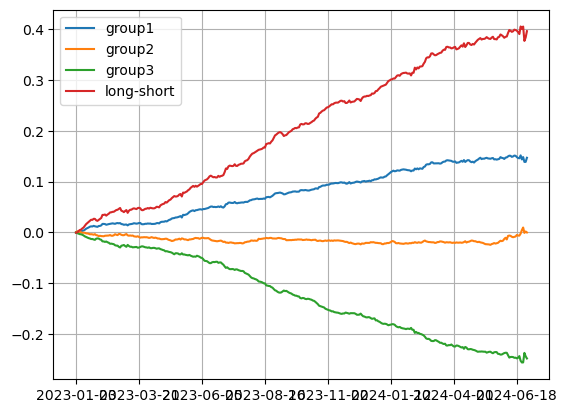

In [906]:
# 样本内
ret5_test = combined_factor_DP.loc['2023-01-03p1':'2024-06-28p2']
factor_gp, factor_zp, factor_dp = cal_pool_factor(ret5_test)
# factor_gp, factor_zp, factor_dp  = net_yjl(factor_gp), net_yjl(factor_zp), net_yjl(factor_dp)
# factor_gp, factor_zp, factor_dp  = exclude_newbond(factor_gp), exclude_newbond(factor_zp), exclude_newbond(factor_dp)
# factor_gp, factor_zp, factor_dp  = exclude_QS(factor_gp), exclude_QS(factor_zp), exclude_QS(factor_dp)
# factor_gp, factor_zp, factor_dp  = factor_std(winsorize(factor_gp)), factor_std(winsorize(factor_zp)), factor_std(winsorize(factor_dp))
# plot_return(factor_gp, 3)
# plot_return(factor_zp, 4)
plot_return(factor_dp, 3)
plt.grid(True)

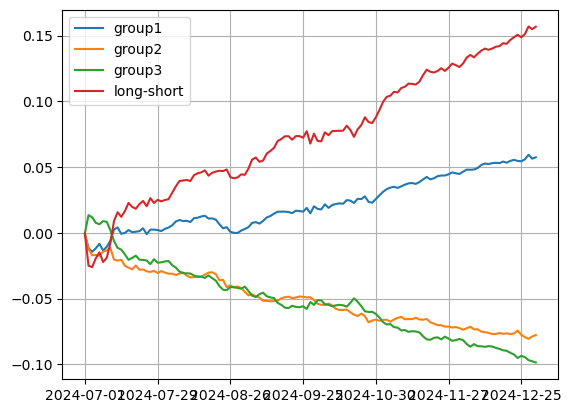

In [905]:
# 样本外
ret5_test = combined_factor_DP.loc['2024-07-01p1':'2024-12-31p2']
factor_gp, factor_zp, factor_dp = cal_pool_factor(ret5_test)
# factor_gp, factor_zp, factor_dp  = net_yjl(factor_gp), net_yjl(factor_zp), net_yjl(factor_dp)
# factor_gp, factor_zp, factor_dp  = exclude_newbond(factor_gp), exclude_newbond(factor_zp), exclude_newbond(factor_dp)
# factor_gp, factor_zp, factor_dp  = exclude_QS(factor_gp), exclude_QS(factor_zp), exclude_QS(factor_dp)
# factor_gp, factor_zp, factor_dp  = factor_std(winsorize(factor_gp)), factor_std(winsorize(factor_zp)), factor_std(winsorize(factor_dp))
# plot_return(factor_gp, 3)
# plot_return(factor_zp, 4)
plot_return(factor_dp, 3)
plt.grid(True)

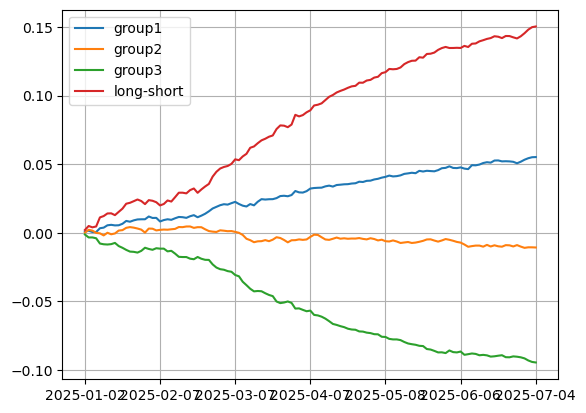

In [907]:
# 测试期
ret5_test = combined_factor_DP.loc['2025-01-02p1':'2025-07-04p2']
factor_gp, factor_zp, factor_dp = cal_pool_factor(ret5_test)
#factor_gp, factor_zp, factor_dp  = net_yjl(factor_gp), net_yjl(factor_zp), net_yjl(factor_dp)
# factor_gp, factor_zp, factor_dp  = exclude_newbond(factor_gp), exclude_newbond(factor_zp), exclude_newbond(factor_dp)
# factor_gp, factor_zp, factor_dp  = exclude_QS(factor_gp), exclude_QS(factor_zp), exclude_QS(factor_dp)
# factor_gp, factor_zp, factor_dp  = factor_std(winsorize(factor_gp)), factor_std(winsorize(factor_zp)), factor_std(winsorize(factor_dp))
# plot_return(factor_gp, 3)
# plot_return(factor_zp, 4)
plot_return(factor_dp, 3)
plt.grid(True)

In [13]:
data_open_min = D.features(instruments = instruments, fields = ['$open'], start_time = '2022-01-01', end_time = '2025-07-07', freq = '1min').unstack().T.droplevel(0)
data_high_min = D.features(instruments = instruments, fields = ['$high'], start_time = '2022-01-01', end_time = '2025-07-07', freq = '1min').unstack().T.droplevel(0)
data_low_min = D.features(instruments = instruments, fields = ['$low'], start_time = '2022-01-01', end_time = '2025-07-07', freq = '1min').unstack().T.droplevel(0)
data_close_min = D.features(instruments = instruments, fields = ['$close'], start_time = '2022-01-01', end_time = '2025-07-07', freq = '1min').unstack().T.droplevel(0)
data_volume_min = D.features(instruments = instruments, fields = ['$volume'], start_time = '2022-01-01', end_time = '2025-07-07', freq = '1min').unstack().T.droplevel(0)
data_amount_min = D.features(instruments = instruments, fields = ['$amount'], start_time = '2022-01-01', end_time = '2025-07-07', freq = '1min').unstack().T.droplevel(0)
data_amount_min.loc['2025-3-19'] = data_close_min.loc['2025-3-19'] * data_volume_min.loc['2025-3-19']
data_amount_min.loc['2025-3-20'] = data_close_min.loc['2025-3-20'] * data_volume_min.loc['2025-3-20']
data_amount_min.loc['2025-3-21'] = data_close_min.loc['2025-3-21'] * data_volume_min.loc['2025-3-21']

In [14]:
date_list = [date.strftime('%Y-%m-%d') for date in data_close.loc['2022-1-1':'2025-07-07'].index]
for date in date_list:
    data_close_min.loc[date] = data_close_min.loc[date].fillna(method = 'ffill')

In [15]:
date_list = [date.strftime('%Y-%m-%d') for date in data_close.loc['2022-1-1':'2025-7-07'].index]
for date in date_list:
    data_open_min.loc[date] = data_open_min.loc[date].fillna(method = 'ffill')

In [16]:
date_list = [date.strftime('%Y-%m-%d') for date in data_close.loc['2022-1-1':'2025-07-04'].index]
time_list = []
for date in date_list:
    time_list = time_list + [date + 'p1', date + 'p2']

In [17]:
data_close_part = {}
for time in time_list:
    date = time[:-2]
    if time.endswith('p1'):
        target_datetime = pd.to_datetime(date) + pd.Timedelta(hours=13, minutes=1)
        data_close_part[time] = data_open_min.loc[target_datetime]
    if time.endswith('p2'):
        try:
            target_datetime = pd.to_datetime(date) + pd.Timedelta(hours=14, minutes=50)
            data_close_part[time] = data_close_min.loc[target_datetime]
        except:
            data_close_part[time] = data_close_min.loc[date].iloc[-1]
data_close_part = pd.DataFrame(data_close_part).T

data_open_part = {}
for time in time_list:
    date = time[:-2]
    if time.endswith('p1'):
        try:
            target_datetime = pd.to_datetime(date) + pd.Timedelta(hours=9, minutes=30)
            data_open_part[time] = data_open_min.loc[target_datetime]
        except:
            data_open_part[time] = data_open_min.loc[date].iloc[0]
    if time.endswith('p2'):
        target_datetime = pd.to_datetime(date) + pd.Timedelta(hours=13, minutes=1)
        data_open_part[time] = data_open_min.loc[target_datetime]
data_open_part = pd.DataFrame(data_open_part).T

In [ ]:
data_compare_True.to_csv('C:/Users/tantra/Desktop/data/比较表格/data_compare_True.csv')
data_compare_False.to_csv('C:/Users/tantra/Desktop/data/比较表格/data_compare_False.csv')

In [907]:
data_compare_True = pd.read_csv('C:/Users/tantra/Desktop/data/比较表格/data_compare_True.csv', parse_dates=['datetime'], index_col='datetime')
data_compare_False = pd.read_csv('C:/Users/tantra/Desktop/data/比较表格/data_compare_False.csv', parse_dates=['datetime'], index_col='datetime')

In [18]:
# 成交量比率合成因子
date_list = [date.strftime('%Y-%m-%d') for date in data_close.loc['2022-1-1':'2025-07-04'].index]

data_compare_True = data_close_min > data_close_min.shift(1)
data_compare_False = data_close_min <= data_close_min.shift(1)

drop_index =[]
for date in date_list:
    drop_index.extend([data_compare_True.loc[date].index[0], data_compare_True.loc[date].index[-1]])
data_compare_True.drop(index = drop_index, inplace = True)
data_compare_False.drop(index = drop_index, inplace = True)

factor1_30min = {}
factor1_1h = {}
factor1_2h = {}
for time in time_list:
    date = time[:-2]
    if time.endswith('p1'):
        # 30min
        begain_time = pd.to_datetime(date) + pd.Timedelta(hours=11)
        end_time = pd.to_datetime(date) + pd.Timedelta(hours=11, minutes=30)
        factor1_30min[time] = data_volume_min.loc[begain_time:end_time][data_compare_True.loc[begain_time:end_time]].dropna(how='all', axis=1).sum() / data_volume_min.loc[begain_time:end_time][data_compare_False.loc[begain_time:end_time]].dropna(how='all', axis=1).sum()
        # 1h
        begain_time = pd.to_datetime(date) + pd.Timedelta(hours=10, minutes=30)
        end_time = pd.to_datetime(date) + pd.Timedelta(hours=11, minutes=30)
        factor1_1h[time] = data_volume_min.loc[begain_time:end_time][data_compare_True.loc[begain_time:end_time]].dropna(how='all', axis=1).sum() / data_volume_min.loc[begain_time:end_time][data_compare_False.loc[begain_time:end_time]].dropna(how='all', axis=1).sum()
        # 2h
        begain_time = pd.to_datetime(date) + pd.Timedelta(hours=9, minutes=31)
        end_time = pd.to_datetime(date) + pd.Timedelta(hours=11, minutes=30)
        factor1_2h[time] = data_volume_min.loc[begain_time:end_time][data_compare_True.loc[begain_time:end_time]].dropna(how='all', axis=1).sum() / data_volume_min.loc[begain_time:end_time][data_compare_False.loc[begain_time:end_time]].dropna(how='all', axis=1).sum()
    if time.endswith('p2'):
        # 30min
        begain_time = pd.to_datetime(date) + pd.Timedelta(hours=14, minutes=20)
        end_time = pd.to_datetime(date) + pd.Timedelta(hours=14, minutes=50)
        #end_time = pd.to_datetime(date) + pd.Timedelta(hours=15)
        factor1_30min[time] = data_volume_min.loc[begain_time:end_time][data_compare_True.loc[begain_time:end_time]].dropna(how='all', axis=1).sum() / data_volume_min.loc[begain_time:end_time][data_compare_False.loc[begain_time:end_time]].dropna(how='all', axis=1).sum()
        # 1h
        begain_time = pd.to_datetime(date) + pd.Timedelta(hours=14)
        #end_time = pd.to_datetime(date) + pd.Timedelta(hours=15)
        end_time = pd.to_datetime(date) + pd.Timedelta(hours=14, minutes=50)
        factor1_1h[time] = data_volume_min.loc[begain_time:end_time][data_compare_True.loc[begain_time:end_time]].dropna(how='all', axis=1).sum() / data_volume_min.loc[begain_time:end_time][data_compare_False.loc[begain_time:end_time]].dropna(how='all', axis=1).sum()
        # 2h
        begain_time = pd.to_datetime(date) + pd.Timedelta(hours=13)
        end_time = pd.to_datetime(date) + pd.Timedelta(hours=14, minutes=50)
        #end_time = pd.to_datetime(date) + pd.Timedelta(hours=15)
        factor1_2h[time] = data_volume_min.loc[begain_time:end_time][data_compare_True.loc[begain_time:end_time]].dropna(how='all', axis=1).sum() / data_volume_min.loc[begain_time:end_time][data_compare_False.loc[begain_time:end_time]].dropna(how='all', axis=1).sum()

factor1_30min = pd.DataFrame(factor1_30min).T 
factor1_1h = pd.DataFrame(factor1_1h).T 
factor1_2h = pd.DataFrame(factor1_2h).T 
factor1_30min.dropna(how='all', axis=1, inplace=True)
factor1_1h.dropna(how='all', axis=1, inplace=True)
factor1_2h.dropna(how='all', axis=1, inplace=True)
factor1_30min = factor1_30min.replace([np.inf, -np.inf], np.nan)
factor1_1h = factor1_1h.replace([np.inf, -np.inf], np.nan)
factor1_2h = factor1_2h.replace([np.inf, -np.inf], np.nan)

In [19]:
# 估波指标
factor2_30min = {}
factor2_1h ={}
factor2_2h ={}
for time in time_list:
    date = time[:-2]
    if time.endswith('p1'):
        # 30min
        begain_time = pd.to_datetime(date) + pd.Timedelta(hours=11)
        end_time = pd.to_datetime(date) + pd.Timedelta(hours=11, minutes=30)
        data = data_close_min.loc[begain_time:end_time]
        R1 = data / data.shift(1) - 1
        R2 = data / data.shift(2) - 1
        factor2_30min[time] = (R1 + R2).mean()  
        # 1h
        begain_time = pd.to_datetime(date) + pd.Timedelta(hours=10, minutes=30)
        end_time = pd.to_datetime(date) + pd.Timedelta(hours=11, minutes=30)
        data = data_close_min.loc[begain_time:end_time]
        R1 = data / data.shift(1) - 1
        R2 = data / data.shift(2) - 1
        factor2_1h[time] = (R1 + R2).mean()
        # 2h
        begain_time = pd.to_datetime(date) + pd.Timedelta(hours=9, minutes=30)
        end_time = pd.to_datetime(date) + pd.Timedelta(hours=11, minutes=30)
        data = data_close_min.loc[begain_time:end_time]
        R1 = data / data.shift(1) - 1
        R2 = data / data.shift(2) - 1
        factor2_2h[time] = (R1 + R2).mean()
    if time.endswith('p2'):
        # 30min
        begain_time = pd.to_datetime(date) + pd.Timedelta(hours=14, minutes=20)
        #end_time = pd.to_datetime(date) + pd.Timedelta(hours=15)
        end_time = pd.to_datetime(date) + pd.Timedelta(hours=14, minutes=50)
        data = data_close_min.loc[begain_time:end_time]
        R1 = data / data.shift(1) - 1
        R2 = data / data.shift(2) - 1
        factor2_30min[time] = (R1 + R2).mean()
        # 1h
        begain_time = pd.to_datetime(date) + pd.Timedelta(hours=14)
        #end_time = pd.to_datetime(date) + pd.Timedelta(hours=15)
        end_time = pd.to_datetime(date) + pd.Timedelta(hours=14, minutes=50)
        data = data_close_min.loc[begain_time:end_time]
        R1 = data / data.shift(1) - 1
        R2 = data / data.shift(2) - 1
        factor2_1h[time] = (R1 + R2).mean()
        # 2h
        begain_time = pd.to_datetime(date) + pd.Timedelta(hours=13)
        #end_time = pd.to_datetime(date) + pd.Timedelta(hours=15)
        end_time = pd.to_datetime(date) + pd.Timedelta(hours=14, minutes=50)
        data = data_close_min.loc[begain_time:end_time]
        R1 = data / data.shift(1) - 1
        R2 = data / data.shift(2) - 1
        factor2_2h[time] = (R1 + R2).mean()

factor2_30min = pd.DataFrame(factor2_30min).T
factor2_1h = pd.DataFrame(factor2_1h).T
factor2_2h = pd.DataFrame(factor2_2h).T

In [982]:
factor_analyse_turnover(factor2)

训练期                           验证期                      \
                 高平池       中平池       低平池       高平池       中平池       低平池   
RankICIR   -0.261656 -0.576284 -0.740733 -0.172086 -0.474511 -0.476201   
多头年化超额（换手）  0.034254  0.106877  0.096245 -0.114517  0.082517  0.092321   
多头超额胜率（换手）  0.507003  0.607843  0.661064  0.471545  0.601626  0.569106   
日均换手率       1.340220  1.496908  1.363018  1.347268  1.515647  1.362369   
概率1         0.573066  0.825215  0.795129  0.491304  0.804348  0.695652   
概率2         0.451289  0.590258  0.803725  0.204348  0.426087  0.617391   

                 测试期                      
                 高平池       中平池       低平池  
RankICIR   -0.364289 -0.701648 -0.801963  
多头年化超额（换手）  0.216930  0.169206  0.135138  
多头超额胜率（换手）  0.614679  0.614679  0.688073  
日均换手率       1.367010  1.532060  1.407054  
概率1         0.628713  0.896040  0.806931  
概率2         0.594059  0.792079  0.900990

In [20]:
factor3_30min = {}
factor3_1h ={}
factor3_2h ={}
for time in time_list:
    date = time[:-2]
    if time.endswith('p1'):
        # 30min
        begain_time = pd.to_datetime(date) + pd.Timedelta(hours=11)
        end_time = pd.to_datetime(date) + pd.Timedelta(hours=11, minutes=30)
        data = data_close_min.loc[begain_time:end_time]
        return_min = data / data.shift(1) - 1
        return_std = return_min.rolling(5).std()
        return_std_std = return_std.rolling(5).std()
        factor_value = return_std_std.corrwith(data_amount_min.loc[begain_time:end_time])
        factor3_30min[time] = factor_value
        # 1h
        begain_time = pd.to_datetime(date) + pd.Timedelta(hours=10, minutes=30)
        end_time = pd.to_datetime(date) + pd.Timedelta(hours=11, minutes=30)
        data = data_close_min.loc[begain_time:end_time]
        return_min = data / data.shift(1) - 1
        return_std = return_min.rolling(5).std()
        return_std_std = return_std.rolling(5).std()
        factor_value = return_std_std.corrwith(data_amount_min.loc[begain_time:end_time])
        factor3_1h[time] = factor_value
        # 2h
        begain_time = pd.to_datetime(date) + pd.Timedelta(hours=9, minutes=30)
        end_time = pd.to_datetime(date) + pd.Timedelta(hours=11, minutes=30)
        data = data_close_min.loc[begain_time:end_time]
        return_min = data / data.shift(1) - 1
        return_std = return_min.rolling(5).std()
        return_std_std = return_std.rolling(5).std()
        factor_value = return_std_std.corrwith(data_amount_min.loc[begain_time:end_time])
        factor3_2h[time] = factor_value
    if time.endswith('p2'):
        # 30min
        begain_time = pd.to_datetime(date) + pd.Timedelta(hours=14, minutes=20)
        #end_time = pd.to_datetime(date) + pd.Timedelta(hours=15)
        end_time = pd.to_datetime(date) + pd.Timedelta(hours=14, minutes=50)
        data = data_close_min.loc[begain_time:end_time]
        return_min = data / data.shift(1) - 1
        return_std = return_min.rolling(5).std()
        return_std_std = return_std.rolling(5).std()
        factor_value = return_std_std.corrwith(data_amount_min.loc[begain_time:end_time])
        factor3_30min[time] = factor_value
        # 1h
        begain_time = pd.to_datetime(date) + pd.Timedelta(hours=14)
        #end_time = pd.to_datetime(date) + pd.Timedelta(hours=15)
        end_time = pd.to_datetime(date) + pd.Timedelta(hours=14, minutes=50)
        data = data_close_min.loc[begain_time:end_time]
        return_min = data / data.shift(1) - 1
        return_std = return_min.rolling(5).std()
        return_std_std = return_std.rolling(5).std()
        factor_value = return_std_std.corrwith(data_amount_min.loc[begain_time:end_time])
        factor3_1h[time] = factor_value
        # 2h
        begain_time = pd.to_datetime(date) + pd.Timedelta(hours=13)
        #end_time = pd.to_datetime(date) + pd.Timedelta(hours=15)
        end_time = pd.to_datetime(date) + pd.Timedelta(hours=14, minutes=50)
        data = data_close_min.loc[begain_time:end_time]
        return_min = data / data.shift(1) - 1
        return_std = return_min.rolling(5).std()
        return_std_std = return_std.rolling(5).std()
        factor_value = return_std_std.corrwith(data_amount_min.loc[begain_time:end_time])
        factor3_2h[time] = factor_value

factor3_30min = pd.DataFrame(factor3_30min).T
factor3_1h = pd.DataFrame(factor3_1h).T
factor3_2h = pd.DataFrame(factor3_2h).T

In [21]:
# 钱德动量摆动
factor4_30min = {}
factor4_1h = {}
factor4_2h = {}
for time in time_list:
    date = time[:-2]
    if time.endswith('p1'):
        # 30min
        begain_time = pd.to_datetime(date) + pd.Timedelta(hours=11)
        end_time = pd.to_datetime(date) + pd.Timedelta(hours=11, minutes=30)
        data = data_close_min.loc[begain_time:end_time]
        data_abs = np.abs(data - data.shift(1))
        SU = data_abs[data_compare_True.loc[begain_time:end_time]].sum()
        SD = data_abs[data_compare_False.loc[begain_time:end_time]].sum()
        factor4_30min[time] = (SU - SD) / (SU + SD)
        # 1h
        begain_time = pd.to_datetime(date) + pd.Timedelta(hours=10, minutes=30)
        end_time = pd.to_datetime(date) + pd.Timedelta(hours=11, minutes=30)
        data = data_close_min.loc[begain_time:end_time]
        data_abs = np.abs(data - data.shift(1))
        SU = data_abs[data_compare_True.loc[begain_time:end_time]].sum()
        SD = data_abs[data_compare_False.loc[begain_time:end_time]].sum()
        factor4_1h[time] = (SU - SD) / (SU + SD)
        # 2h
        begain_time = pd.to_datetime(date) + pd.Timedelta(hours=9, minutes=30)
        end_time = pd.to_datetime(date) + pd.Timedelta(hours=11, minutes=30)
        data = data_close_min.loc[begain_time:end_time]
        data_abs = np.abs(data - data.shift(1))
        SU = data_abs[data_compare_True.loc[begain_time:end_time]].sum()
        SD = data_abs[data_compare_False.loc[begain_time:end_time]].sum()
        factor4_2h[time] = (SU - SD) / (SU + SD)
    if time.endswith('p2'):
        # 30min
        begain_time = pd.to_datetime(date) + pd.Timedelta(hours=14, minutes=20)
        #end_time = pd.to_datetime(date) + pd.Timedelta(hours=15)
        end_time = pd.to_datetime(date) + pd.Timedelta(hours=14, minutes=50)
        data = data_close_min.loc[begain_time:end_time]
        data_abs = np.abs(data - data.shift(1))
        SU = data_abs[data_compare_True.loc[begain_time:end_time]].sum()
        SD = data_abs[data_compare_False.loc[begain_time:end_time]].sum()
        factor4_30min[time] = (SU - SD) / (SU + SD)
        # 1h
        begain_time = pd.to_datetime(date) + pd.Timedelta(hours=14)
        #end_time = pd.to_datetime(date) + pd.Timedelta(hours=15)
        end_time = pd.to_datetime(date) + pd.Timedelta(hours=14, minutes=50)
        data = data_close_min.loc[begain_time:end_time]
        data_abs = np.abs(data - data.shift(1))
        SU = data_abs[data_compare_True.loc[begain_time:end_time]].sum()
        SD = data_abs[data_compare_False.loc[begain_time:end_time]].sum()
        factor4_1h[time] = (SU - SD) / (SU + SD)
        # 2h
        begain_time = pd.to_datetime(date) + pd.Timedelta(hours=13)
        #end_time = pd.to_datetime(date) + pd.Timedelta(hours=15)
        end_time = pd.to_datetime(date) + pd.Timedelta(hours=14, minutes=50)
        data = data_close_min.loc[begain_time:end_time]
        data_abs = np.abs(data - data.shift(1))
        SU = data_abs[data_compare_True.loc[begain_time:end_time]].sum()
        SD = data_abs[data_compare_False.loc[begain_time:end_time]].sum()
        factor4_2h[time] = (SU - SD) / (SU + SD)

factor4_30min = pd.DataFrame(factor4_30min).T
factor4_1h = pd.DataFrame(factor4_1h).T
factor4_2h = pd.DataFrame(factor4_2h).T

In [22]:
# 模糊金额比因子
factor5_30min = {}
factor5_1h ={}
factor5_2h ={}
for time in time_list:
    date = time[:-2]
    if time.endswith('p1'):
        # 30min
        begain_time = pd.to_datetime(date) + pd.Timedelta(hours=11)
        end_time = pd.to_datetime(date) + pd.Timedelta(hours=11, minutes=30)
        data = data_close_min.loc[begain_time:end_time]
        min_index = data.index
        return_min = data / data.shift(1) - 1
        return_std = return_min.rolling(5).std()
        return_std_std = return_std.rolling(5).std()
        return_std_std_mean = return_std_std.mean()
        factor5_30min[time] = data_amount_min.loc[min_index][return_std_std > return_std_std_mean].mean() / data_amount_min.loc[min_index].mean()
        # 1h
        begain_time = pd.to_datetime(date) + pd.Timedelta(hours=10, minutes=30)
        end_time = pd.to_datetime(date) + pd.Timedelta(hours=11, minutes=30)
        data = data_close_min.loc[begain_time:end_time]
        min_index = data.index
        return_min = data / data.shift(1) - 1
        return_std = return_min.rolling(5).std()
        return_std_std = return_std.rolling(5).std()
        return_std_std_mean = return_std_std.mean()
        factor5_1h[time] = data_amount_min.loc[min_index][return_std_std > return_std_std_mean].mean() / data_amount_min.loc[min_index].mean()
        # 2h
        begain_time = pd.to_datetime(date) + pd.Timedelta(hours=9, minutes=30)
        end_time = pd.to_datetime(date) + pd.Timedelta(hours=11, minutes=30)
        data = data_close_min.loc[begain_time:end_time]
        min_index = data.index
        return_min = data / data.shift(1) - 1
        return_std = return_min.rolling(5).std()
        return_std_std = return_std.rolling(5).std()
        return_std_std_mean = return_std_std.mean()
        factor5_2h[time] = data_amount_min.loc[min_index][return_std_std > return_std_std_mean].mean() / data_amount_min.loc[min_index].mean()
    if time.endswith('p2'):
        # 30min
        begain_time = pd.to_datetime(date) + pd.Timedelta(hours=14, minutes=20)
        #end_time = pd.to_datetime(date) + pd.Timedelta(hours=15)
        end_time = pd.to_datetime(date) + pd.Timedelta(hours=14, minutes=50)
        data = data_close_min.loc[begain_time:end_time]
        min_index = data.index
        return_min = data / data.shift(1) - 1
        return_std = return_min.rolling(5).std()
        return_std_std = return_std.rolling(5).std()
        return_std_std_mean = return_std_std.mean()
        factor5_30min[time] = data_amount_min.loc[min_index][return_std_std > return_std_std_mean].mean() / data_amount_min.loc[min_index].mean()
        # 1h
        begain_time = pd.to_datetime(date) + pd.Timedelta(hours=14)
        #end_time = pd.to_datetime(date) + pd.Timedelta(hours=15)
        end_time = pd.to_datetime(date) + pd.Timedelta(hours=14, minutes=50)
        data = data_close_min.loc[begain_time:end_time]
        min_index = data.index
        return_min = data / data.shift(1) - 1
        return_std = return_min.rolling(5).std()
        return_std_std = return_std.rolling(5).std()
        return_std_std_mean = return_std_std.mean()
        factor5_1h[time] = data_amount_min.loc[min_index][return_std_std > return_std_std_mean].mean() / data_amount_min.loc[min_index].mean()
        # 2h
        begain_time = pd.to_datetime(date) + pd.Timedelta(hours=13)
        #end_time = pd.to_datetime(date) + pd.Timedelta(hours=15)
        end_time = pd.to_datetime(date) + pd.Timedelta(hours=14, minutes=50)
        data = data_close_min.loc[begain_time:end_time]
        min_index = data.index
        return_min = data / data.shift(1) - 1
        return_std = return_min.rolling(5).std()
        return_std_std = return_std.rolling(5).std()
        return_std_std_mean = return_std_std.mean()
        factor5_2h[time] = data_amount_min.loc[min_index][return_std_std > return_std_std_mean].mean() / data_amount_min.loc[min_index].mean()

factor5_30min = pd.DataFrame(factor5_30min).T
factor5_1h = pd.DataFrame(factor5_1h).T
factor5_2h = pd.DataFrame(factor5_2h).T

In [23]:
# 动量修正
factor6_30min = {}
factor6_1h ={}
factor6_2h ={}
for time in time_list:
    date = time[:-2]
    if time.endswith('p1'):
        # 30min
        begain_time = pd.to_datetime(date) + pd.Timedelta(hours=11)
        end_time = pd.to_datetime(date) + pd.Timedelta(hours=11, minutes=30)
        data = data_close_min.loc[begain_time:end_time]
        close_max = data.rolling(2).max()
        factor6_30min[time] = ((data - data.shift(1)) / close_max).mean()
        # 1h
        begain_time = pd.to_datetime(date) + pd.Timedelta(hours=10, minutes=30)
        end_time = pd.to_datetime(date) + pd.Timedelta(hours=11, minutes=30)
        data = data_close_min.loc[begain_time:end_time]
        close_max = data.rolling(2).max()
        factor6_1h[time] = ((data - data.shift(1)) / close_max).mean()
        # 2h
        begain_time = pd.to_datetime(date) + pd.Timedelta(hours=9, minutes=30)
        end_time = pd.to_datetime(date) + pd.Timedelta(hours=11, minutes=30)
        data = data_close_min.loc[begain_time:end_time]
        close_max = data.rolling(2).max()
        factor6_2h[time] = ((data - data.shift(1)) / close_max).mean()
    if time.endswith('p2'):
        # 30min
        begain_time = pd.to_datetime(date) + pd.Timedelta(hours=14, minutes=20)
        #end_time = pd.to_datetime(date) + pd.Timedelta(hours=15)
        end_time = pd.to_datetime(date) + pd.Timedelta(hours=14, minutes=50)
        data = data_close_min.loc[begain_time:end_time]
        close_max = data.rolling(2).max()
        factor6_30min[time] = ((data - data.shift(1)) / close_max).mean()
        # 1h
        begain_time = pd.to_datetime(date) + pd.Timedelta(hours=14)
        #end_time = pd.to_datetime(date) + pd.Timedelta(hours=15)
        end_time = pd.to_datetime(date) + pd.Timedelta(hours=14, minutes=50)
        data = data_close_min.loc[begain_time:end_time]
        close_max = data.rolling(2).max()
        factor6_1h[time] = ((data - data.shift(1)) / close_max).mean()
        # 2h
        begain_time = pd.to_datetime(date) + pd.Timedelta(hours=13)
        #end_time = pd.to_datetime(date) + pd.Timedelta(hours=15)
        end_time = pd.to_datetime(date) + pd.Timedelta(hours=14, minutes=50)
        data = data_close_min.loc[begain_time:end_time]
        close_max = data.rolling(2).max()
        factor6_2h[time] = ((data - data.shift(1)) / close_max).mean()

factor6_30min = pd.DataFrame(factor6_30min).T
factor6_1h = pd.DataFrame(factor6_1h).T
factor6_2h = pd.DataFrame(factor6_2h).T

In [24]:
# 动态买卖气指标
date_list = [date.strftime('%Y-%m-%d') for date in data_close.loc['2022-1-1':'2025-7-07'].index]

data_compare_DTM = data_open_min > data_open_min.shift(1)
data_compare_DBM = data_open_min >= data_open_min.shift(1)

drop_index =[]
for date in date_list:
    drop_index.extend([data_compare_DTM.loc[date].index[0], data_compare_DTM.loc[date].index[-1]])

data_compare_DTM.drop(index = drop_index, inplace = True)
data_compare_DBM.drop(index = drop_index, inplace = True)

factor7_30min = {}
factor7_1h = {}
factor7_2h = {}
HO = data_high_min - data_open_min
OO = data_open_min - data_open_min.shift(1)
OL = data_open_min - data_low_min
DTM = np.maximum(HO,OO)[data_compare_DTM]
DBM = np.maximum(OL,OO)[data_compare_DBM]
for time in time_list:
    date = time[:-2]
    if time.endswith('p1'):
        # 30min
        begain_time = pd.to_datetime(date) + pd.Timedelta(hours=11)
        end_time = pd.to_datetime(date) + pd.Timedelta(hours=11, minutes=30)
        STM = DTM.loc[begain_time:end_time].sum()
        SBM = DBM.loc[begain_time:end_time].sum()
        factor7_30min[time] = (STM - SBM) / np.maximum(STM,SBM)
        # 1h
        begain_time = pd.to_datetime(date) + pd.Timedelta(hours=10, minutes=30)
        end_time = pd.to_datetime(date) + pd.Timedelta(hours=11, minutes=30)
        STM = DTM.loc[begain_time:end_time].sum()
        SBM = DBM.loc[begain_time:end_time].sum()
        factor7_1h[time] = (STM - SBM) / np.maximum(STM,SBM)
        # 2h
        begain_time = pd.to_datetime(date) + pd.Timedelta(hours=9, minutes=30)
        end_time = pd.to_datetime(date) + pd.Timedelta(hours=11, minutes=30)
        STM = DTM.loc[begain_time:end_time].sum()
        SBM = DBM.loc[begain_time:end_time].sum()
        factor7_2h[time] = (STM - SBM) / np.maximum(STM,SBM)
    if time.endswith('p2'):
        # 30min
        begain_time = pd.to_datetime(date) + pd.Timedelta(hours=14, minutes=20)
        #end_time = pd.to_datetime(date) + pd.Timedelta(hours=15)
        end_time = pd.to_datetime(date) + pd.Timedelta(hours=14, minutes=50)
        STM = DTM.loc[begain_time:end_time].sum()
        SBM = DBM.loc[begain_time:end_time].sum()
        factor7_30min[time] = (STM - SBM) / np.maximum(STM,SBM)
        # 1h
        begain_time = pd.to_datetime(date) + pd.Timedelta(hours=14)
        #end_time = pd.to_datetime(date) + pd.Timedelta(hours=15)
        end_time = pd.to_datetime(date) + pd.Timedelta(hours=14, minutes=50)
        STM = DTM.loc[begain_time:end_time].sum()
        SBM = DBM.loc[begain_time:end_time].sum()
        factor7_1h[time] = (STM - SBM) / np.maximum(STM,SBM)
        # 2h
        begain_time = pd.to_datetime(date) + pd.Timedelta(hours=13)
        #end_time = pd.to_datetime(date) + pd.Timedelta(hours=15)
        end_time = pd.to_datetime(date) + pd.Timedelta(hours=14, minutes=50)
        STM = DTM.loc[begain_time:end_time].sum()
        SBM = DBM.loc[begain_time:end_time].sum()
        factor7_2h[time] = (STM - SBM) / np.maximum(STM,SBM)

factor7_30min = pd.DataFrame(factor7_30min).T
factor7_1h = pd.DataFrame(factor7_1h).T
factor7_2h = pd.DataFrame(factor7_2h).T

In [25]:
# 平均真实波幅
factor9_30min = {}
factor9_1h = {}
factor9_2h = {}
for time in time_list:
    date = time[:-2]
    if time.endswith('p1'):
        # 1h
        begain_time = pd.to_datetime(date) + pd.Timedelta(hours=11)
        end_time = pd.to_datetime(date) + pd.Timedelta(hours=11, minutes=30)
        high_low = data_high_min.loc[begain_time:end_time] - data_low_min.loc[begain_time:end_time]
        close_high = data_close_min.loc[begain_time:end_time].shift(1) - data_high_min.loc[begain_time:end_time]
        abs_close_low = np.abs(data_close_min.loc[begain_time:end_time].shift(1) - data_low_min.loc[begain_time:end_time])
        atr = np.maximum(np.maximum(high_low, close_high), abs_close_low)
        ATR = atr.iloc[1:-1].mean()
        factor9_30min[time] = ATR
        # 1h
        begain_time = pd.to_datetime(date) + pd.Timedelta(hours=10, minutes=30)
        end_time = pd.to_datetime(date) + pd.Timedelta(hours=11, minutes=30)
        high_low = data_high_min.loc[begain_time:end_time] - data_low_min.loc[begain_time:end_time]
        close_high = data_close_min.loc[begain_time:end_time].shift(1) - data_high_min.loc[begain_time:end_time]
        abs_close_low = np.abs(data_close_min.loc[begain_time:end_time].shift(1) - data_low_min.loc[begain_time:end_time])
        atr = np.maximum(np.maximum(high_low, close_high), abs_close_low)
        ATR = atr.iloc[1:-1].mean()
        factor9_1h[time] = ATR
        # 2h
        begain_time = pd.to_datetime(date) + pd.Timedelta(hours=9, minutes=30)
        end_time = pd.to_datetime(date) + pd.Timedelta(hours=11, minutes=30)
        high_low = data_high_min.loc[begain_time:end_time] - data_low_min.loc[begain_time:end_time]
        close_high = data_close_min.loc[begain_time:end_time].shift(1) - data_high_min.loc[begain_time:end_time]
        abs_close_low = np.abs(data_close_min.loc[begain_time:end_time].shift(1) - data_low_min.loc[begain_time:end_time])
        atr = np.maximum(np.maximum(high_low, close_high), abs_close_low)
        ATR = atr.iloc[1:-1].mean()
        factor9_2h[time] = ATR
    if time.endswith('p2'):
        # 30min
        begain_time = pd.to_datetime(date) + pd.Timedelta(hours=14, minutes=20)
        #end_time = pd.to_datetime(date) + pd.Timedelta(hours=15)
        end_time = pd.to_datetime(date) + pd.Timedelta(hours=14, minutes=50)
        high_low = data_high_min.loc[begain_time:end_time] - data_low_min.loc[begain_time:end_time]
        close_high = data_close_min.loc[begain_time:end_time].shift(1) - data_high_min.loc[begain_time:end_time]
        abs_close_low = np.abs(data_close_min.loc[begain_time:end_time].shift(1) - data_low_min.loc[begain_time:end_time])
        atr = np.maximum(np.maximum(high_low, close_high), abs_close_low)
        ATR = atr.iloc[1:-1].mean()
        factor9_30min[time] = ATR
        # 1h
        begain_time = pd.to_datetime(date) + pd.Timedelta(hours=14)
        #end_time = pd.to_datetime(date) + pd.Timedelta(hours=15)
        end_time = pd.to_datetime(date) + pd.Timedelta(hours=14, minutes=50)
        high_low = data_high_min.loc[begain_time:end_time] - data_low_min.loc[begain_time:end_time]
        close_high = data_close_min.loc[begain_time:end_time].shift(1) - data_high_min.loc[begain_time:end_time]
        abs_close_low = np.abs(data_close_min.loc[begain_time:end_time].shift(1) - data_low_min.loc[begain_time:end_time])
        atr = np.maximum(np.maximum(high_low, close_high), abs_close_low)
        ATR = atr.iloc[1:-1].mean()
        factor9_1h[time] = ATR
        # 2h
        begain_time = pd.to_datetime(date) + pd.Timedelta(hours=13)
        #end_time = pd.to_datetime(date) + pd.Timedelta(hours=15)
        end_time = pd.to_datetime(date) + pd.Timedelta(hours=14, minutes=50)
        high_low = data_high_min.loc[begain_time:end_time] - data_low_min.loc[begain_time:end_time]
        close_high = data_close_min.loc[begain_time:end_time].shift(1) - data_high_min.loc[begain_time:end_time]
        abs_close_low = np.abs(data_close_min.loc[begain_time:end_time].shift(1) - data_low_min.loc[begain_time:end_time])
        atr = np.maximum(np.maximum(high_low, close_high), abs_close_low)
        ATR = atr.iloc[1:-1].mean()
        factor9_2h[time] = ATR

factor9_30min = pd.DataFrame(factor9_30min).T
factor9_1h = pd.DataFrame(factor9_1h).T
factor9_2h = pd.DataFrame(factor9_2h).T

In [102]:
# 中平246因子加权6期合成
factor2_ZP = win_std(factor2.rolling(6).apply(lambda x : weight_sum(x, N=6)))
factor4_ZP= win_std(factor4.rolling(6).apply(lambda x : weight_sum(x, N=6)))
factor6_ZP = win_std(factor6.rolling(6).apply(lambda x : weight_sum(x, N=6)))
combined_factor_ZP = factor2_ZP + factor4_ZP + factor6_ZP

In [110]:
factor_analyse_turnover(combined_factor_ZP)

训练期                           验证期                      \
                 高平池       中平池       低平池       高平池       中平池       低平池   
RankICIR   -0.152510 -0.347703 -0.421888 -0.197664 -0.347646 -0.281701   
多头年化超额（换手）  0.015082  0.118438  0.087937  0.077206  0.124669  0.012029   
多头超额胜率（换手）  0.495798  0.602241  0.610644  0.544715  0.650407  0.569106   
日均换手率       0.603410  0.712988  0.633697  0.624413  0.737855  0.631893   
概率1         0.651862  0.743553  0.843840  0.647826  0.734783  0.578261   
概率2         0.309456  0.640401  0.732092  0.352174  0.573913  0.678261   

                 测试期                      
                 高平池       中平池       低平池  
RankICIR   -0.242199 -0.586583 -0.570894  
多头年化超额（换手）  0.166415  0.234507  0.118493  
多头超额胜率（换手）  0.512605  0.739496  0.689076  
日均换手率       0.626520  0.745706  0.678458  
概率1         0.648649  0.891892  0.747748  
概率2         0.481982  0.945946  0.815315

In [ ]:
p1_index = [x for x in factor1.index if x.endswith('p1')]
p2_index = [x for x in factor1.index if x.endswith('p2')]
factor1.loc[p2_index]

In [480]:
cal_corr_matrix([factor1, factor2, factor3, factor4, factor5, factor6, factor7, factor9],['factor1','factor2','factor3','factor4','factor5','factor6','factor7','factor9'])#['成交量比率', '估波指标', '模糊金额比', '动量修正', '钱德动量摆动'] )#['溢价率', '期权价值偏移', '纯债溢价率', '成交量比率合成因子', '估波指标', '模糊金额比', '随波逐流'])

,factor1,factor2,factor3,factor4,factor5,factor6,factor7,factor9
factor1,1.0,0.316187,0.09801,0.45416,0.093209,0.320053,0.224985,0.143659
factor2,0.314789,1.0,0.056689,0.689856,0.145139,0.977545,0.232334,0.082618
factor3,0.098219,0.056689,1.0,0.056419,0.643621,0.055941,0.122782,0.314907
factor4,0.452499,0.689856,0.056419,1.0,0.107372,0.715708,0.292077,0.03785
factor5,0.0927,0.145139,0.643621,0.107372,1.0,0.137668,0.109666,0.121185
factor6,0.318566,0.977545,0.055941,0.715708,0.137668,1.0,0.243635,0.076486
factor7,0.22528,0.232334,0.122782,0.292077,0.109666,0.243635,1.0,0.119401
factor9,0.143591,0.082618,0.314907,0.03785,0.121185,0.076486,0.119401,1.0


In [43]:
# 高平池P1
factor2_std = win_std(factor2_30min)
factor9_std = win_std(factor9_30min)
factor9_net = pd.DataFrame(net_factor(factor9_std, [factor2_std])).T
combined_factor_GP_P1 = factor2_std + factor9_net

In [147]:
# 高平池P2 计算因子时间段不变
factor1_std = win_std(factor1_2h)
factor3_std = win_std(factor3_2h)
factor4_std = win_std(factor4_2h)
factor5_std = win_std(factor5_2h)
factor9_std = win_std(factor9_2h)

factor9_net = pd.DataFrame(net_factor(factor9_std, [factor3_std])).T
factor5_net = pd.DataFrame(net_factor(factor5_std, [factor3_std,factor9_net])).T
factor1_net = pd.DataFrame(net_factor(factor1_std, [factor3_std,factor9_net,factor5_net])).T # 反向
factor4_net = pd.DataFrame(net_factor(factor4_std, [factor3_std,factor9_net,factor5_net,factor1_net])).T
combined_factor_GP_P2 = factor3_std - factor1_net + factor4_net + factor5_net

In [1239]:
# 高平合成因子
combined_factor = {}
c1 = combined_factor_GP_P1
c2 = combined_factor_GP_P2
for i in combined_factor_GP_P1.index:
    if i.endswith('p1'):
        combined_factor[i] = c2.loc[i]
    if i.endswith('p2'):
        combined_factor[i] = c1.loc[i]
combined_factor_GP = pd.DataFrame(combined_factor).T

In [690]:
factor_analyse_turnover(combined_factor)

训练期                           验证期                      \
                 高平池       中平池       低平池       高平池       中平池       低平池   
RankICIR   -0.552931 -0.594167 -0.547450 -0.508660 -0.571960 -0.452163   
多头年化超额（换手）  0.147976  0.119410  0.056970  0.269217  0.139359 -0.005656   
多头超额胜率（换手）  0.560224  0.644258  0.610644  0.650407  0.682927  0.544715   
日均换手率       1.281119  1.529169  1.372852  1.303107  1.515853  1.364256   
概率1         0.597997  0.723891  0.785408  0.839827  0.805195  0.679654   
概率2         0.593705  0.711016  0.688126  0.619048  0.588745  0.506494   

                 测试期                      
                 高平池       中平池       低平池  
RankICIR   -0.437882 -0.696492 -0.665951  
多头年化超额（换手）  0.296657  0.158156  0.088276  
多头超额胜率（换手）  0.638655  0.655462  0.638655  
日均换手率       1.264519  1.524041  1.368545  
概率1         0.675676  0.833333  0.914414  
概率2         0.675676  0.531532  0.770270

In [153]:
# 中平池P1
factor2_std = win_std(factor2_1h)
factor4_std = win_std(factor4_1h)
factor6_std = win_std(factor6_1h)
combined_factor_ZP_P1 = factor2_std + factor6_std# + factor4_std

In [156]:
# 中平池P2 计算因子时间段不变
factor2_std = win_std(factor2_2h)
factor3_std = win_std(factor3_2h)
factor4_std = win_std(factor4_2h)
factor5_std = win_std(factor5_2h)
factor6_std = win_std(factor6_2h)
factor5_net = pd.DataFrame(net_factor(factor5_std, [factor3_std])).T #反向
factor6_net = pd.DataFrame(net_factor(factor6_std, [factor3_std,factor5_net])).T 
factor4_net = pd.DataFrame(net_factor(factor4_std, [factor3_std,factor5_net,factor6_net])).T
factor2_net = pd.DataFrame(net_factor(factor2_std, [factor3_std,factor5_net,factor6_net,factor4_net])).T
combined_factor_ZP_P2 = factor3_std - factor5_net + factor6_net + factor4_net + factor2_net

In [162]:
# 中平池P2 计算因子时间段不变
factor2_std = win_std(factor2_1h)
factor3_std = win_std(factor3_1h)
factor4_std = win_std(factor4_1h)
factor5_std = win_std(factor5_1h)
factor6_std = win_std(factor6_1h)
factor5_net = pd.DataFrame(net_factor(factor5_std, [factor3_std])).T #反向
factor6_net = pd.DataFrame(net_factor(factor6_std, [factor3_std,factor5_net])).T 
factor4_net = pd.DataFrame(net_factor(factor4_std, [factor3_std,factor5_net,factor6_net])).T
factor2_net = pd.DataFrame(net_factor(factor2_std, [factor3_std,factor5_net,factor6_net,factor4_net])).T
combined_factor_ZP_P2 = factor3_std - factor5_net + factor6_net + factor4_net + factor2_net

In [1237]:
# 中平合成因子
combined_factor = {}
c1 = combined_factor_ZP_P1
c2 = combined_factor_ZP_P2
for i in combined_factor_ZP_P1.index:
    if i.endswith('p1'):
        combined_factor[i] = c2.loc[i]
    if i.endswith('p2'):
        combined_factor[i] = c1.loc[i]
combined_factor_ZP = pd.DataFrame(combined_factor).T

In [476]:
factor_analyse_turnover(combined_factor)

训练期                           验证期                      \
                 高平池       中平池       低平池       高平池       中平池       低平池   
RankICIR   -0.376755 -0.660407 -0.763411 -0.293241 -0.657612 -0.652999   
多头年化超额（换手）  0.074607  0.171484  0.098696  0.037360  0.171120  0.102826   
多头超额胜率（换手）  0.543417  0.669468  0.658263  0.544715  0.650407  0.634146   
日均换手率       1.409033  1.560693  1.393946  1.402896  1.574976  1.416959   
概率1         0.580830  0.773963  0.832618  0.567100  0.783550  0.675325   
概率2         0.549356  0.825465  0.838340  0.471861  0.627706  0.896104   

                 测试期                      
                 高平池       中平池       低平池  
RankICIR   -0.282550 -0.792691 -0.819255  
多头年化超额（换手）  0.207624  0.189792  0.121232  
多头超额胜率（换手）  0.621849  0.680672  0.689076  
日均换手率       1.404750  1.570869  1.410273  
概率1         0.747748  0.945946  0.936937  
概率2         0.572072  0.689189  0.945946

In [165]:
# 低平池P1 
factor2_std = win_std(factor2_30min)
factor4_std = win_std(factor4_30min)
factor6_std = win_std(factor6_30min)
combined_factor_DP_P1 = factor2_std + factor4_std + factor6_std

In [168]:
# 低平池P2
factor2_std = win_std(factor2_2h)
factor3_std = win_std(factor3_2h)
factor4_std = win_std(factor4_2h)
factor6_std = win_std(factor6_2h)
factor4_net = pd.DataFrame(net_factor(factor4_std, [factor2_std])).T
factor6_net = pd.DataFrame(net_factor(factor6_std, [factor2_std,factor4_net])).T #
factor3_net = pd.DataFrame(net_factor(factor3_std, [factor2_std,factor4_net,factor6_net])).T
combined_factor_DP_P2 = factor2_std + factor4_net - factor6_net + factor3_net

In [1238]:
# 低平合成因子
combined_factor = {}
c1 = combined_factor_DP_P1
c2 = combined_factor_DP_P2
for i in combined_factor_DP_P1.index:
    if i.endswith('p1'):
        combined_factor[i] = c2.loc[i]
    if i.endswith('p2'):
        combined_factor[i] = c1.loc[i]
combined_factor_DP = pd.DataFrame(combined_factor).T

In [649]:
factor_analyse_turnover(combined_factor)

训练期                           验证期                      \
                 高平池       中平池       低平池       高平池       中平池       低平池   
RankICIR   -0.333773 -0.642971 -0.789401 -0.253838 -0.656318 -0.625769   
多头年化超额（换手）  0.066523  0.154256  0.098303  0.010144  0.189648  0.117278   
多头超额胜率（换手）  0.535014  0.672269  0.666667  0.536585  0.674797  0.634146   
日均换手率       1.399486  1.557698  1.395942  1.392085  1.569202  1.416518   
概率1         0.546495  0.842632  0.825465  0.515152  0.805195  0.636364   
概率2         0.546495  0.798283  0.778255  0.402597  0.731602  0.917749   

                 测试期                      
                 高平池       中平池       低平池  
RankICIR   -0.338315 -0.847352 -0.802619  
多头年化超额（换手）  0.233664  0.190980  0.114939  
多头超额胜率（换手）  0.613445  0.655462  0.705882  
日均换手率       1.399904  1.560816  1.409144  
概率1         0.734234  0.941441  0.900901  
概率2         0.590090  0.671171  0.954955

In [866]:
t = pd.DataFrame(net_factor(combined_factor_DP_P2, [factor2_std,factor9_net])).T

In [1006]:
#p2_index = [x for x in factor1.index if x.endswith('p2')]
t = factor9.copy()
#t.loc[p2_index] = t.loc[p2_index].rolling(3).apply(lambda x : weight_sum(x,N=3))

In [ ]:
factor2_std = win_std(factor2)
factor4_std = win_std(factor4)
factor6_std = win_std(factor6)
factor3_net = pd.DataFrame(net_factor(factor3_std, [factor2_std])).T
factor9_net = pd.DataFrame(net_factor(factor9_std, [factor2_std,factor3_net])).T #-
factor1_net = pd.DataFrame(net_factor(factor1_std, [factor2_std,factor3_net,factor9_net])).T
combined_factor_ZP_P2 = factor2_std + factor3_net - factor9_net - factor1_net

In [130]:
combined_factor_GP_P2 = factor3_std + factor4_net - factor1_net #+ factor5_net# + factor1_net

In [169]:
#t = pd.DataFrame(net_factor(factor7, [factor2,factor9_net,factor3_net])).T
#t = factor1#.rolling(2).apply(lambda x : weight_sum(x, N=2))
#t = pd.DataFrame(net_factor(factor5_std, [factor3_std,factor9_net])).T
factor_gp, factor_zp, factor_dp = cal_pool_factor(combined_factor_DP_P2.loc['2023-01-03p1':'2025-07-04p2'])

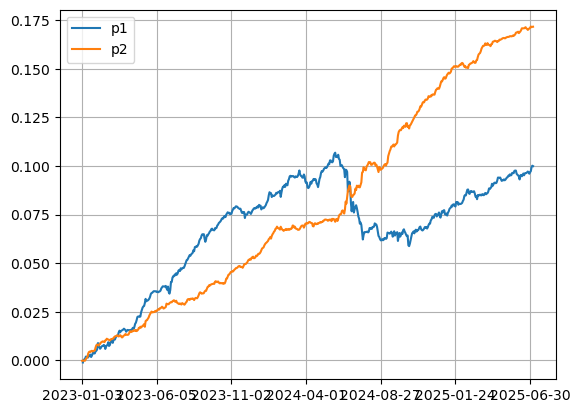

In [170]:
group_return = pd.DataFrame(cal_group_return(factor_dp, 3)).T.shift(1)
p1_index = [x for x in group_return.index if x.endswith('p1')]
p2_index = [x for x in group_return.index if x.endswith('p2')]
group_return_p1 = group_return.loc[p1_index]
group_return_p2 = group_return.loc[p2_index]
s1 = (group_return_p1['group'+str(1)] - group_return_p1['benchmark']).cumsum()
s2 = (group_return_p2['group'+str(1)] - group_return_p2['benchmark']).cumsum()
s1.index = [x[:-2] for x in s1.index]
s2.index = [x[:-2] for x in s2.index]
s1.name = 'p1'
s2.name = 'p2'
s3 = pd.concat([s1, s2], names=['p1','p2'], axis=1)
s3.plot()
plt.grid(True)

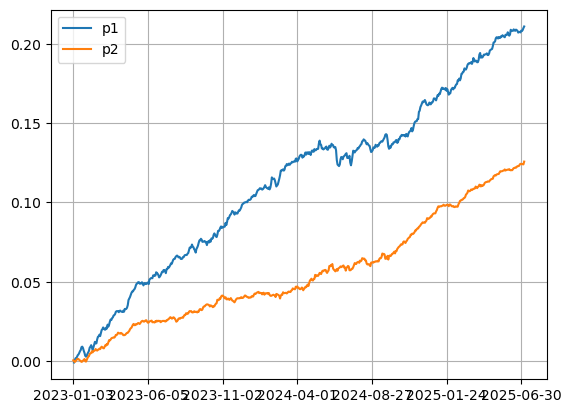

In [164]:
group_return = pd.DataFrame(cal_group_return(factor_zp, 4)).T.shift(1)
p1_index = [x for x in group_return.index if x.endswith('p1')]
p2_index = [x for x in group_return.index if x.endswith('p2')]
group_return_p1 = group_return.loc[p1_index]
group_return_p2 = group_return.loc[p2_index]
s1 = (group_return_p1['group'+str(1)] - group_return_p1['benchmark']).cumsum()
s2 = (group_return_p2['group'+str(1)] - group_return_p2['benchmark']).cumsum()
s1.index = [x[:-2] for x in s1.index]
s2.index = [x[:-2] for x in s2.index]
s1.name = 'p1'
s2.name = 'p2'
s3 = pd.concat([s1, s2], names=['p1','p2'], axis=1)
s3.plot()
plt.grid(True)

In [307]:
factor_analyse(yjl_factor)

训练期                           验证期                      \
               高平池       中平池       低平池       高平池       中平池       低平池   
RankICIR -0.084384 -0.210553 -0.012544 -0.060292 -0.088005  0.123328   
多头年化超额    0.081594  0.050985  0.034147  0.190344  0.144182 -0.100154   
多头超额胜率    0.533520  0.530726  0.555866  0.556452  0.556452  0.491935   
多空夏普比率    1.873662  2.105818  0.652589  3.066546  3.211987 -3.069054   
概率1       0.493562  0.497854  0.442060  0.571429  0.575758  0.216450   
概率2       0.456366  0.413448  0.400572  0.662338  0.597403  0.333333   

               测试期                      
               高平池       中平池       低平池  
RankICIR  0.082729  0.053588 -0.012887  
多头年化超额   -0.132156 -0.030373  0.018509  
多头超额胜率    0.408333  0.458333  0.558333  
多空夏普比率   -2.596487 -2.156262  0.428394  
概率1       0.243243  0.045045  0.450450  
概率2       0.220721  0.162162  0.536036

In [319]:
factor_analyse_turnover(combined_factor)

训练期                           验证期                      \
                 高平池       中平池       低平池       高平池       中平池       低平池   
RankICIR   -0.413323 -0.545820 -0.379393 -0.403934 -0.368573 -0.137586   
多头年化超额（换手）  0.137892  0.117911  0.034470  0.295700  0.143348 -0.080916   
多头超额胜率（换手）  0.591036  0.621849  0.549020  0.658537  0.609756  0.463415   
日均换手率       1.487716  1.581926  1.417188  1.489777  1.605802  1.359428   
概率1         0.589413  0.793991  0.715308  0.904762  0.792208  0.359307   
概率2         0.537911  0.709585  0.670959  0.831169  0.597403  0.199134   

                 测试期                      
                 高平池       中平池       低平池  
RankICIR   -0.343908 -0.465266 -0.585899  
多头年化超额（换手）  0.401519  0.159571  0.085020  
多头超额胜率（换手）  0.613445  0.647059  0.596639  
日均换手率       1.561987  1.605528  1.428523  
概率1         0.837838  0.783784  0.936937  
概率2         0.720721  0.689189  0.761261

In [318]:
combined_factor = {}
c1 = pd.DataFrame(factor_std(factor_dict(combined_factor_GP_P1))).T
c2 = yjl_factor
for i in combined_factor_GP_P1.index:
    if i.endswith('p1'):
        combined_factor[i] = c2.loc[i]
    if i.endswith('p2'):
        combined_factor[i] = c1.loc[i]
combined_factor = pd.DataFrame(combined_factor).T

In [352]:
factor_gp, factor_zp, factor_dp = cal_pool_factor(yjl_factor.loc['2023-01-03p1':'2025-07-04p2'])

In [357]:
long_bond = {}
for i in factor_gp.keys():
    long_bond[i] = factor_gp[i].iloc[int(len(factor_gp[i])/3):]

In [ ]:
def exclude_QS(factor):
    for date in factor.keys():
        dates = date[:-2]
        factor[date] = factor[date][QS.loc[dates] == 0]
    return factor

In [358]:
date = list(long_bond.keys())[0]
dates = date[:-2]
len(long_bond[date][QS.loc[dates] == 0])

78

In [359]:
len(long_bond[date])

78

In [351]:
long_bond = exclude_ST(long_bond)
long_bond = exclude_newbond(long_bond)
long_bond = exclude_QS(long_bond)

In [312]:
bond = {}
for i in long_bond.keys():
    bond[i] = sorted(long_bond[i].index.tolist())

In [314]:
pd.Series(bond).to_csv('C:/Users/tantra/Desktop/多头股池和绝对收益/日内溢价率多头股池.csv')

In [ ]:
long_return = {}
for i in bond.keys():
    bond_list = bond[i]
    long_return[i] = (data_close_part.shift(-1) / data_close_part - 1).loc[i,bond_list].mean()
long_return

In [125]:
pd.Series(long_return).shift(1)

2023-01-03p1         NaN
2023-01-03p2    0.004793
2023-01-04p1    0.007337
2023-01-04p2   -0.000058
2023-01-05p1    0.008005
                  ...   
2025-07-02p2   -0.002264
2025-07-03p1    0.003466
2025-07-03p2    0.004963
2025-07-04p1    0.000590
2025-07-04p2   -0.000926
Length: 1210, dtype: float64

In [126]:
pd.Series(long_return).shift(1).groupby([x[:-2] for x in pd.Series(long_return).index]).sum()

2023-01-03    0.004793
2023-01-04    0.007279
2023-01-05    0.009387
2023-01-06    0.004915
2023-01-09    0.002736
                ...   
2025-06-30    0.006393
2025-07-01    0.007254
2025-07-02   -0.006024
2025-07-03    0.008429
2025-07-04   -0.000336
Length: 605, dtype: float64

In [164]:
pd.Series(long_return).shift(1).groupby([x[:-2] for x in pd.Series(long_return).index]).sum().to_csv('C:/Users/tantra/Desktop/多头股池和绝对收益/日内高平多头绝对收益.csv')

In [ ]:
pd.Series(long_return).shift(1).groupby([x[:-2] for x in pd.Series(long_return).index]).sum()

0.4561681671111728

In [ ]:
combined_factor.dropna(how='all')

<Axes: >

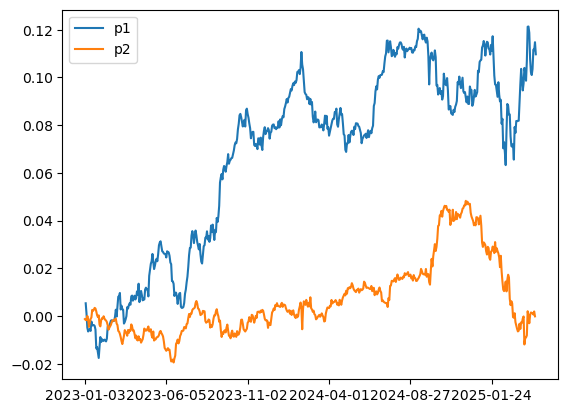

In [212]:
group_return = pd.DataFrame(cal_group_return(factor_gp, 3)).T.shift(1)
p1_index = [x for x in group_return.index if x.endswith('p1')]
p2_index = [x for x in group_return.index if x.endswith('p2')]
group_return_p1 = group_return.loc[p1_index]
group_return_p2 = group_return.loc[p2_index]
s1 = (group_return_p1['group'+str(1)] - group_return_p1['benchmark']).cumsum()
s2 = (group_return_p2['group'+str(1)] - group_return_p2['benchmark']).cumsum()
s1.index = [x[:-2] for x in s1.index]
s2.index = [x[:-2] for x in s2.index]
s1.name = 'p1'
s2.name = 'p2'
s3 = pd.concat([s1, s2], names=['p1','p2'], axis=1)
s3.plot()

In [375]:
# 中平池P1 P2
factor_2 = pd.DataFrame(factor_std(winsorize(factor_dict(factor2)))).T.rolling(6).apply(lambda x : weight_sum(x, N=6))
factor_4 = pd.DataFrame(factor_std(winsorize(factor_dict(factor4)))).T.rolling(6).apply(lambda x : weight_sum(x, N=6))
factor_6 = pd.DataFrame(factor_std(winsorize(factor_dict(factor6)))).T.rolling(6).apply(lambda x : weight_sum(x, N=6))
combined_factor_ZP_P1 = factor_2 + factor_4 + factor_6